# Anatomical Processing Quality Control
# Jupyter Notebook for checking brain mirroring and registration results

In [8]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from nilearn import plotting, image
import os

# Configuration
PROCESSED_DIR = '/user_data/csimmon2/long_pt'
MNI_BRAIN = '/opt/fsl/6.0.3/data/standard/MNI152_T1_2mm_brain.nii.gz'

# Subject info - CORRECTED
SUBJECTS_INFO = {
    'sub-004': {'sessions': [1, 2, 3, 5, 6], 'intact_hemi': 'left'},
    'sub-007': {'sessions': [1, 3, 4], 'intact_hemi': 'right'}, 
    'sub-021': {'sessions': [1, 2, 3], 'intact_hemi': 'left'}
}

print("Setup complete!")

Setup complete!


In [9]:
def check_files_exist():
    """Check if all expected files were created"""
    print("=== FILE EXISTENCE CHECK ===\n")
    
    total_sessions = 0
    completed_sessions = 0
    
    for subject_id, info in SUBJECTS_INFO.items():
        print(f"{subject_id} (intact: {info['intact_hemi']}):")
        
        for session in info['sessions']:
            total_sessions += 1
            anat_dir = f'{PROCESSED_DIR}/{subject_id}/ses-{session:02d}/anat'
            
            files_to_check = {
                'Brain': f'{anat_dir}/{subject_id}_ses-{session:02d}_T1w_brain.nii.gz',
                'Mirrored': f'{anat_dir}/{subject_id}_ses-{session:02d}_T1w_brain_mirrored.nii.gz',
                'Registered': f'{anat_dir}/{subject_id}_ses-{session:02d}_T1w_brain_stand.nii.gz',
                'Transform': f'{anat_dir}/anat2stand.mat'
            }
            
            session_complete = True
            status_line = f"  ses-{session:02d}: "
            
            for name, filepath in files_to_check.items():
                if os.path.exists(filepath):
                    status_line += f"{name}✓ "
                else:
                    status_line += f"{name}✗ "
                    session_complete = False
            
            print(status_line)
            if session_complete:
                completed_sessions += 1
    
    print(f"\nSUMMARY: {completed_sessions}/{total_sessions} sessions complete")
    return completed_sessions, total_sessions

completed, total = check_files_exist()

=== FILE EXISTENCE CHECK ===

sub-004 (intact: left):
  ses-01: Brain✓ Mirrored✓ Registered✓ Transform✓ 
  ses-02: Brain✓ Mirrored✓ Registered✓ Transform✓ 
  ses-03: Brain✓ Mirrored✓ Registered✓ Transform✓ 
  ses-05: Brain✓ Mirrored✓ Registered✓ Transform✓ 
  ses-06: Brain✓ Mirrored✓ Registered✓ Transform✓ 
sub-007 (intact: right):
  ses-01: Brain✓ Mirrored✓ Registered✓ Transform✓ 
  ses-03: Brain✓ Mirrored✓ Registered✓ Transform✓ 
  ses-04: Brain✓ Mirrored✓ Registered✓ Transform✓ 
sub-021 (intact: left):
  ses-01: Brain✓ Mirrored✓ Registered✓ Transform✓ 
  ses-02: Brain✓ Mirrored✓ Registered✓ Transform✓ 
  ses-03: Brain✓ Mirrored✓ Registered✓ Transform✓ 

SUMMARY: 11/11 sessions complete



=== MIRRORING CHECK: sub-004 ses-01 ===


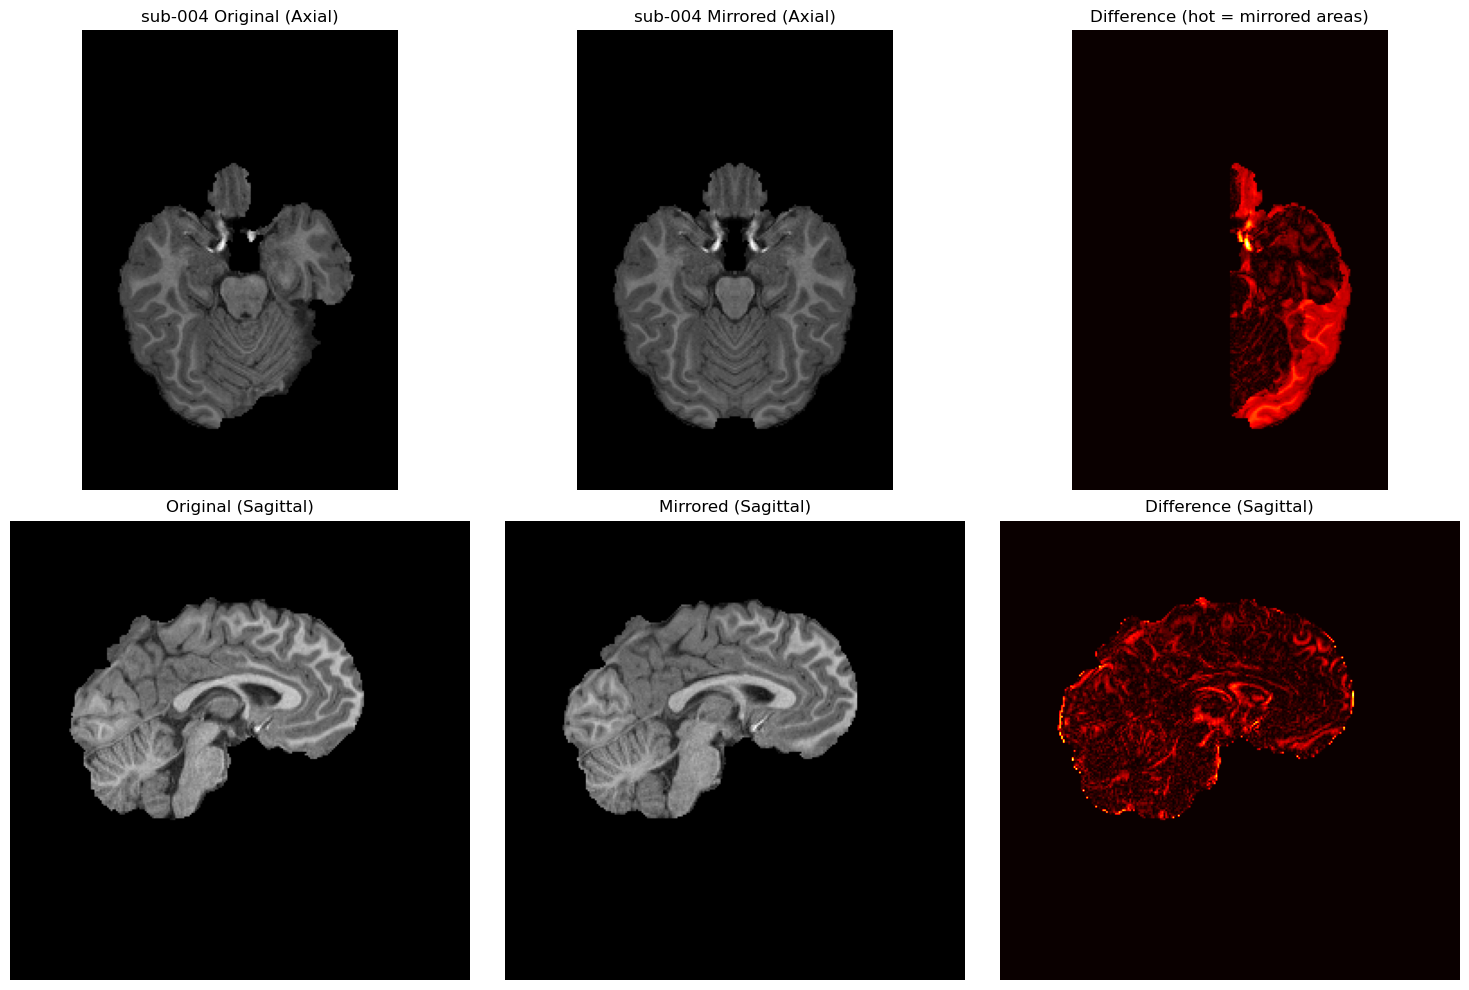

Intact hemisphere: left
Brain shape: (176, 256, 256)
Voxels with differences: 728,007
Max difference: 633.12

=== MIRRORING CHECK: sub-007 ses-01 ===


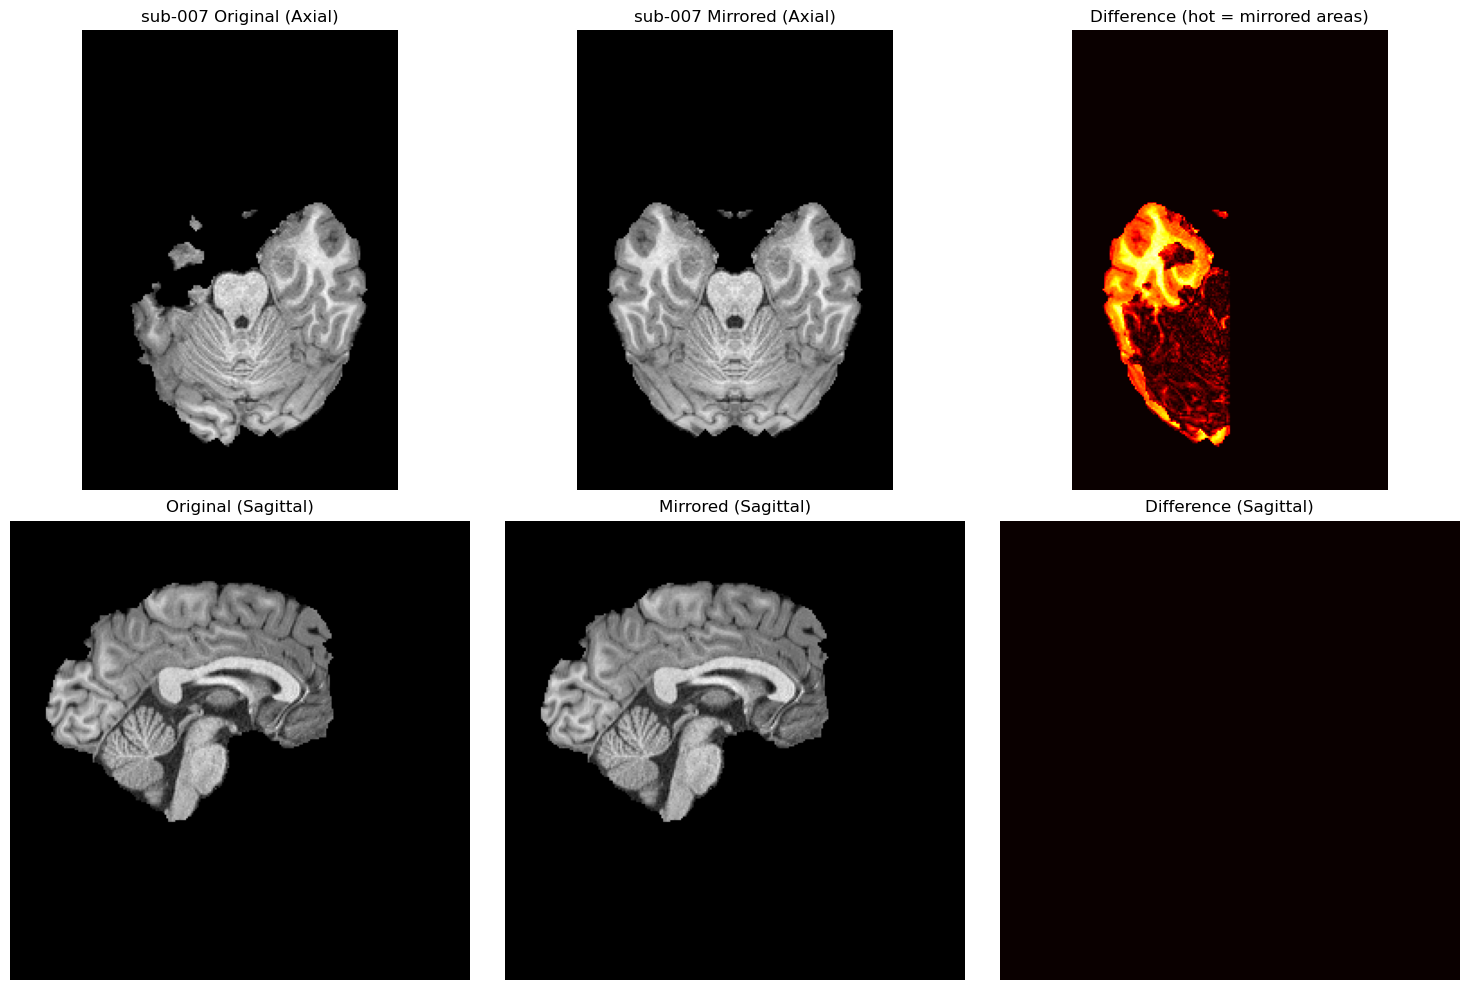

Intact hemisphere: right
Brain shape: (176, 256, 256)
Voxels with differences: 840,047
Max difference: 438.86

=== MIRRORING CHECK: sub-021 ses-01 ===


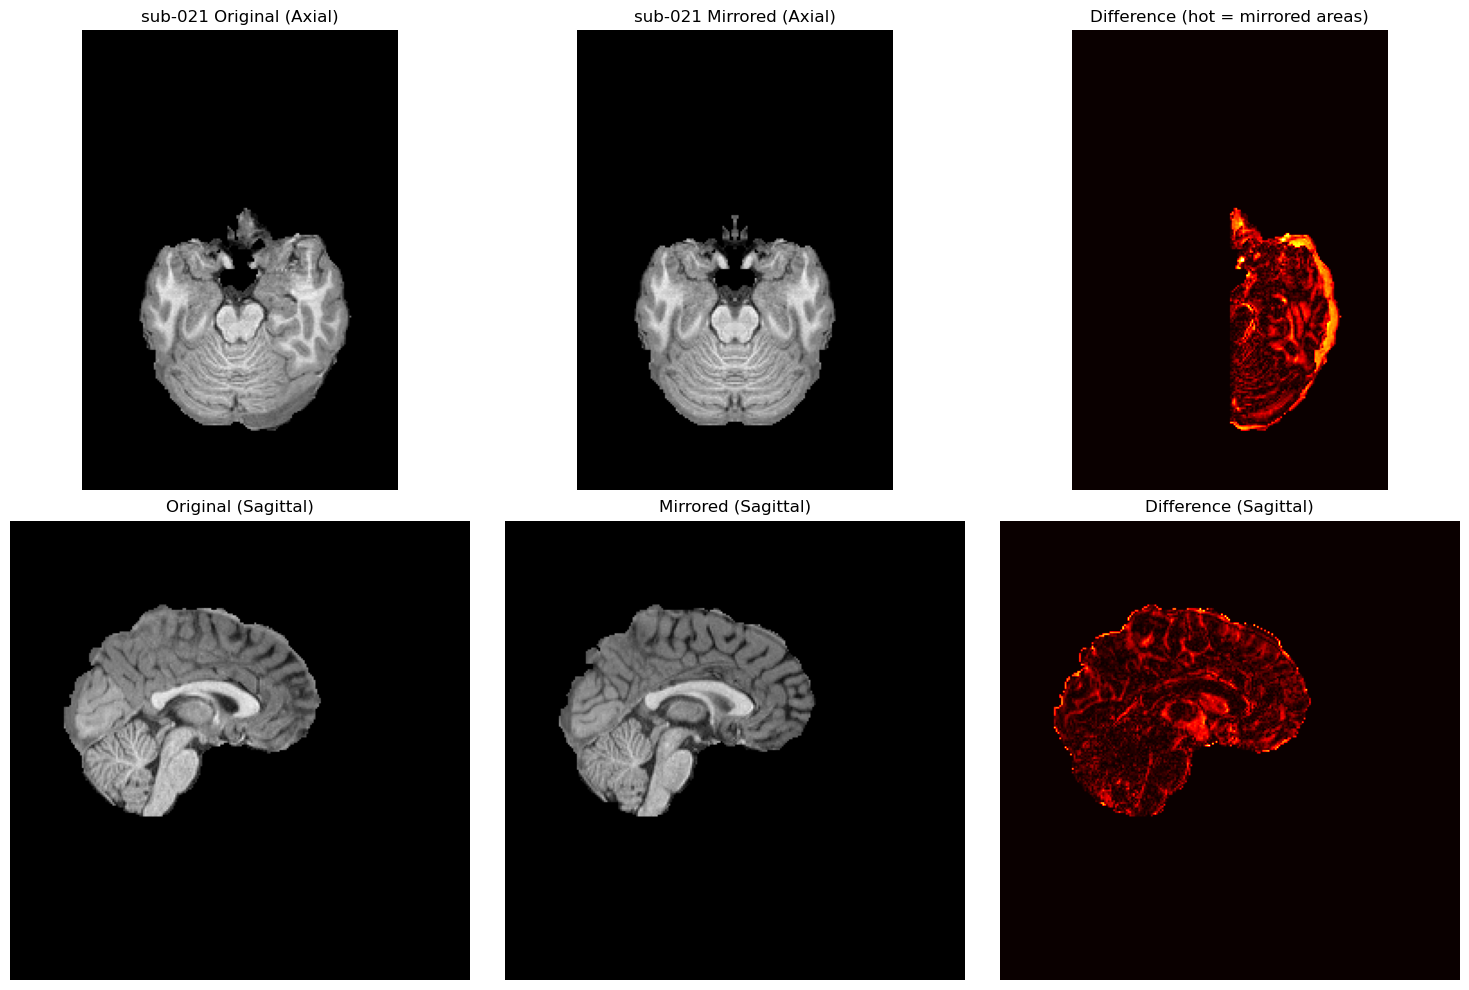

Intact hemisphere: left
Brain shape: (176, 256, 256)
Voxels with differences: 552,218
Max difference: 397.85


In [10]:
def visualize_mirroring(subject_id, session):
    """Visualize original vs mirrored brain"""
    print(f"\n=== MIRRORING CHECK: {subject_id} ses-{session:02d} ===")
    
    anat_dir = f'{PROCESSED_DIR}/{subject_id}/ses-{session:02d}/anat'
    original = f'{anat_dir}/{subject_id}_ses-{session:02d}_T1w_brain.nii.gz'
    mirrored = f'{anat_dir}/{subject_id}_ses-{session:02d}_T1w_brain_mirrored.nii.gz'
    
    if not (os.path.exists(original) and os.path.exists(mirrored)):
        print("Files not found!")
        return
    
    # Load images
    orig_img = nib.load(original)
    mirror_img = nib.load(mirrored)
    orig_data = orig_img.get_fdata()
    mirror_data = mirror_img.get_fdata()
    
    # Get middle slice
    mid_slice = orig_data.shape[2] // 2
    
    # Create visualization
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    
    # Top row: Axial view
    axes[0,0].imshow(orig_data[:, :, mid_slice].T, cmap='gray', origin='lower')
    axes[0,0].set_title(f'{subject_id} Original (Axial)')
    axes[0,0].axis('off')
    
    axes[0,1].imshow(mirror_data[:, :, mid_slice].T, cmap='gray', origin='lower')
    axes[0,1].set_title(f'{subject_id} Mirrored (Axial)')
    axes[0,1].axis('off')
    
    diff = np.abs(orig_data - mirror_data)
    axes[0,2].imshow(diff[:, :, mid_slice].T, cmap='hot', origin='lower')
    axes[0,2].set_title('Difference (hot = mirrored areas)')
    axes[0,2].axis('off')
    
    # Bottom row: Sagittal view
    mid_sag = orig_data.shape[0] // 2
    axes[1,0].imshow(orig_data[mid_sag, :, :].T, cmap='gray', origin='lower')
    axes[1,0].set_title('Original (Sagittal)')
    axes[1,0].axis('off')
    
    axes[1,1].imshow(mirror_data[mid_sag, :, :].T, cmap='gray', origin='lower')
    axes[1,1].set_title('Mirrored (Sagittal)')
    axes[1,1].axis('off')
    
    axes[1,2].imshow(diff[mid_sag, :, :].T, cmap='hot', origin='lower')
    axes[1,2].set_title('Difference (Sagittal)')
    axes[1,2].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Print stats
    intact_hemi = SUBJECTS_INFO[subject_id]['intact_hemi']
    print(f"Intact hemisphere: {intact_hemi}")
    print(f"Brain shape: {orig_data.shape}")
    print(f"Voxels with differences: {np.sum(diff > 0.1):,}")
    print(f"Max difference: {np.max(diff):.2f}")

# Check mirroring for each subject's first session
for subject_id in SUBJECTS_INFO.keys():
    first_session = SUBJECTS_INFO[subject_id]['sessions'][0]
    visualize_mirroring(subject_id, first_session)


=== REGISTRATION CHECK: sub-004 ses-01 ===
Registered shape: (91, 109, 91)
MNI template shape: (91, 109, 91)


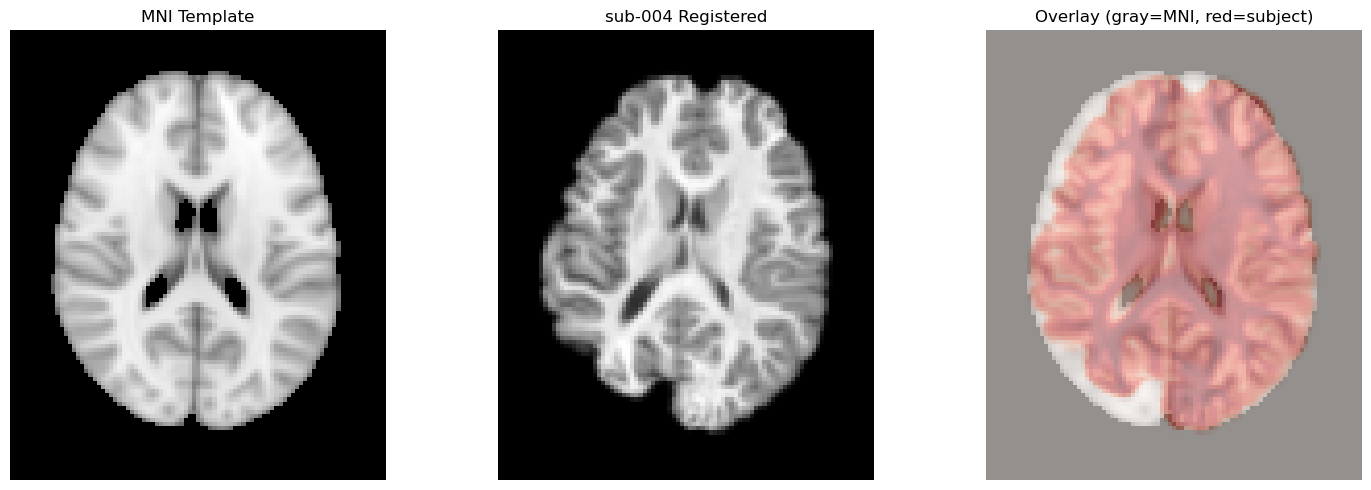


=== REGISTRATION CHECK: sub-007 ses-01 ===
Registered shape: (91, 109, 91)
MNI template shape: (91, 109, 91)


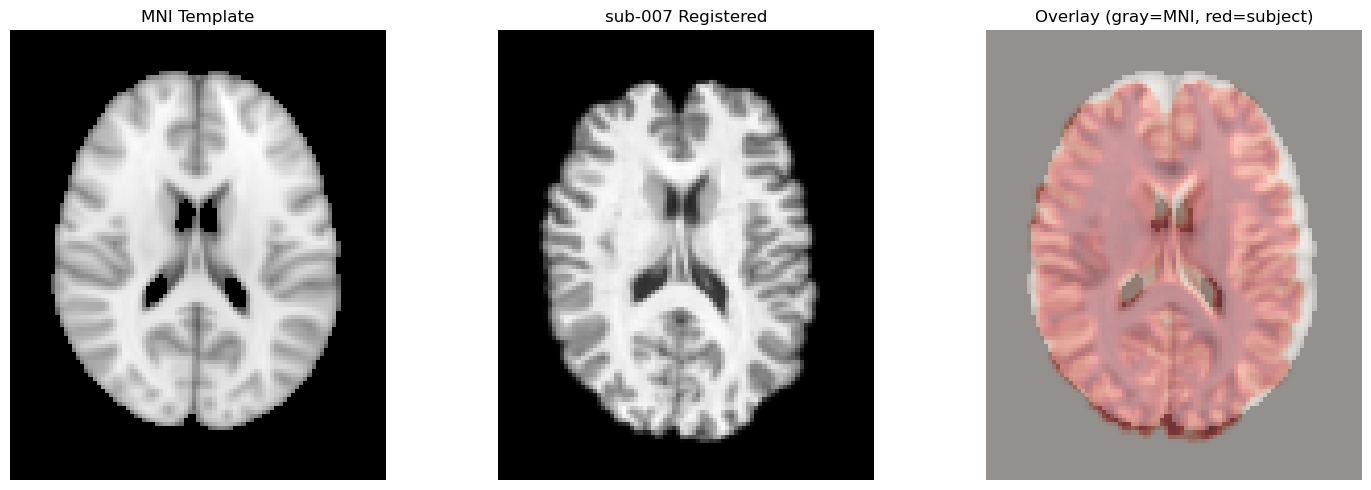


=== REGISTRATION CHECK: sub-021 ses-01 ===
Registered shape: (91, 109, 91)
MNI template shape: (91, 109, 91)


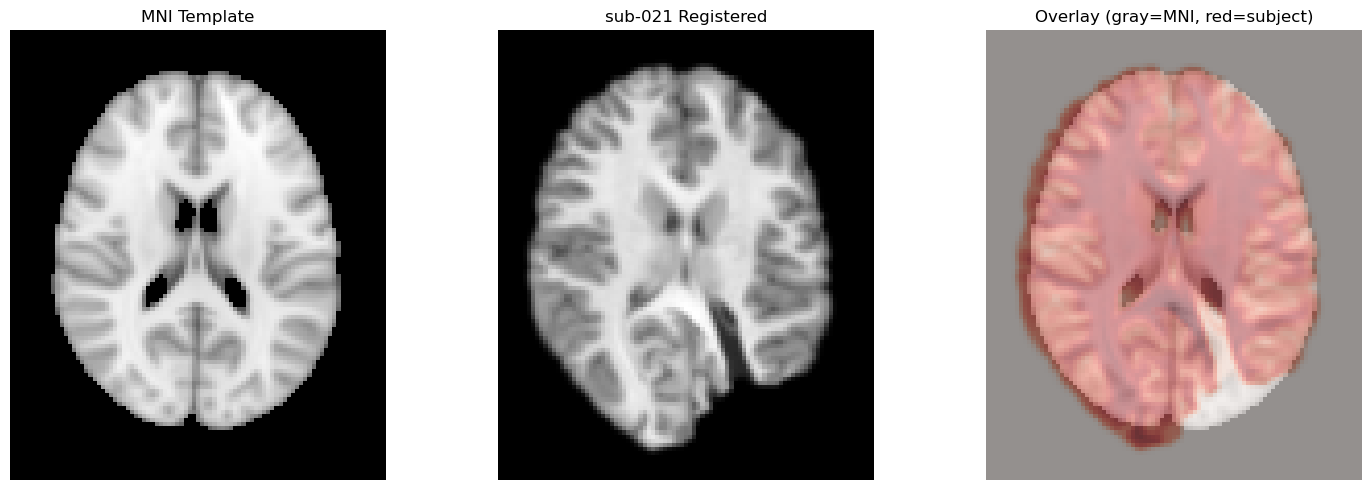

In [11]:
def check_registration(subject_id, session):
    """Check registration to MNI space"""
    print(f"\n=== REGISTRATION CHECK: {subject_id} ses-{session:02d} ===")
    
    anat_dir = f'{PROCESSED_DIR}/{subject_id}/ses-{session:02d}/anat'
    registered = f'{anat_dir}/{subject_id}_ses-{session:02d}_T1w_brain_stand.nii.gz'
    
    if not os.path.exists(registered):
        print("Registered brain not found!")
        return
    
    if not os.path.exists(MNI_BRAIN):
        print("MNI template not found!")
        return
    
    # Load images
    reg_img = nib.load(registered)
    mni_img = nib.load(MNI_BRAIN)
    reg_data = reg_img.get_fdata()
    mni_data = mni_img.get_fdata()
    
    print(f"Registered shape: {reg_data.shape}")
    print(f"MNI template shape: {mni_data.shape}")
    
    # Visualization
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    mid_slice = reg_data.shape[2] // 2
    
    # MNI template
    axes[0].imshow(mni_data[:, :, mid_slice].T, cmap='gray', origin='lower')
    axes[0].set_title('MNI Template')
    axes[0].axis('off')
    
    # Registered brain
    axes[1].imshow(reg_data[:, :, mid_slice].T, cmap='gray', origin='lower')
    axes[1].set_title(f'{subject_id} Registered')
    axes[1].axis('off')
    
    # Overlay
    axes[2].imshow(mni_data[:, :, mid_slice].T, cmap='gray', origin='lower', alpha=0.7)
    axes[2].imshow(reg_data[:, :, mid_slice].T, cmap='Reds', origin='lower', alpha=0.4)
    axes[2].set_title('Overlay (gray=MNI, red=subject)')
    axes[2].axis('off')
    
    plt.tight_layout()
    plt.show()

# Check registration for each subject's first session
for subject_id in SUBJECTS_INFO.keys():
    first_session = SUBJECTS_INFO[subject_id]['sessions'][0]
    check_registration(subject_id, first_session)

In [12]:
def final_assessment():
    """Final quality assessment"""
    print("=== FINAL ASSESSMENT ===\n")
    
    issues = []
    
    for subject_id, info in SUBJECTS_INFO.items():
        print(f"{subject_id}:")
        
        for session in info['sessions']:
            anat_dir = f'{PROCESSED_DIR}/{subject_id}/ses-{session:02d}/anat'
            
            # Check critical files
            transform = f'{anat_dir}/anat2stand.mat'
            mirrored = f'{anat_dir}/{subject_id}_ses-{session:02d}_T1w_brain_mirrored.nii.gz'
            
            if os.path.exists(transform) and os.path.exists(mirrored):
                status = "✓ Ready for FEAT"
            else:
                status = "✗ Issues found"
                issues.append(f"{subject_id} ses-{session:02d}")
            
            print(f"  ses-{session:02d}: {status}")
    
    if not issues:
        print("\n🎉 ALL SUBJECTS READY FOR FEAT ANALYSIS!")
        print("\nNext steps:")
        print("1. Generate .fsf files")
        print("2. Run FEAT first-level analyses")
        print("3. Run FEAT higher-level analyses")
    else:
        print(f"\n⚠️ Issues with: {', '.join(issues)}")
        print("Check processing logs for these sessions.")

final_assessment()

=== FINAL ASSESSMENT ===

sub-004:
  ses-01: ✓ Ready for FEAT
  ses-02: ✓ Ready for FEAT
  ses-03: ✓ Ready for FEAT
  ses-05: ✓ Ready for FEAT
  ses-06: ✓ Ready for FEAT
sub-007:
  ses-01: ✓ Ready for FEAT
  ses-03: ✓ Ready for FEAT
  ses-04: ✓ Ready for FEAT
sub-021:
  ses-01: ✓ Ready for FEAT
  ses-02: ✓ Ready for FEAT
  ses-03: ✓ Ready for FEAT

🎉 ALL SUBJECTS READY FOR FEAT ANALYSIS!

Next steps:
1. Generate .fsf files
2. Run FEAT first-level analyses
3. Run FEAT higher-level analyses


Saved comparison showing anatomical vs functional ROI alignment


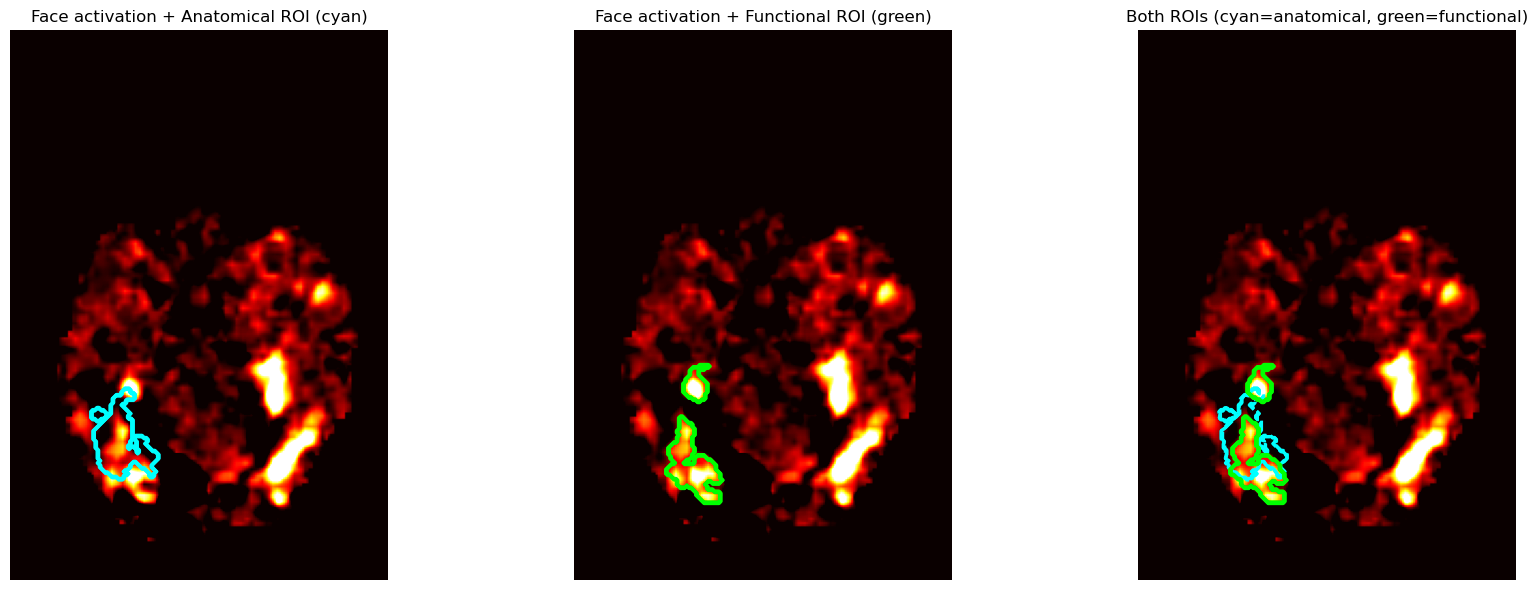

In [1]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

base = '/user_data/csimmon2/long_pt'
subject = 'sub-007'
session = '01'

# Load
face_zstat = nib.load(f'{base}/{subject}/ses-{session}/derivatives/fsl/loc/HighLevel.gfeat/cope10.feat/stats/zstat1.nii.gz')
roi_anat = nib.load(f'{base}/{subject}/ses-{session}/ROIs/l_VOTC_FG_OTS_mask.nii.gz')
roi_func = nib.load(f'{base}/{subject}/ses-{session}/ROIs/l_VOTC_functional_final.nii.gz')

face_data = face_zstat.get_fdata()
roi_anat_data = roi_anat.get_fdata()
roi_func_data = roi_func.get_fdata()

# Find a good slice
z_slice = 130

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Show activation with anatomical ROI
axes[0].imshow(np.rot90(face_data[:, :, z_slice]), cmap='hot', vmin=0, vmax=8)
axes[0].contour(np.rot90(roi_anat_data[:, :, z_slice]), colors='cyan', linewidths=2)
axes[0].set_title('Face activation + Anatomical ROI (cyan)')
axes[0].axis('off')

# Show activation with functional ROI
axes[1].imshow(np.rot90(face_data[:, :, z_slice]), cmap='hot', vmin=0, vmax=8)
axes[1].contour(np.rot90(roi_func_data[:, :, z_slice]), colors='lime', linewidths=2)
axes[1].set_title('Face activation + Functional ROI (green)')
axes[1].axis('off')

# Show both ROIs together
axes[2].imshow(np.rot90(face_data[:, :, z_slice]), cmap='hot', vmin=0, vmax=8)
axes[2].contour(np.rot90(roi_anat_data[:, :, z_slice]), colors='cyan', linewidths=2, linestyles='dashed')
axes[2].contour(np.rot90(roi_func_data[:, :, z_slice]), colors='lime', linewidths=2)
axes[2].set_title('Both ROIs (cyan=anatomical, green=functional)')
axes[2].axis('off')

plt.tight_layout()
plt.savefig(f'{base}/analyses/{subject}_roi_comparison.png', dpi=150)
print(f"Saved comparison showing anatomical vs functional ROI alignment")

In [8]:
import nibabel as nib
import numpy as np
from scipy import ndimage
from nilearn.input_data import NiftiSpheresMasker
import pandas as pd
import os

base = '/user_data/csimmon2/long_pt'

# Correct mapping
subjects_config = {
    'sub-004': {'hemi': 'l', 'patient': 'UD', 'resection': 'right'},
    'sub-007': {'hemi': 'l', 'patient': 'OT', 'resection': 'left'},   # control
    'sub-021': {'hemi': 'r', 'patient': 'TC', 'resection': 'left'}
}

# ROI definitions
roi_definitions = {
    'FFA': {'cope': 10, 'name': 'face_scramble'},
    'PPA': {'cope': 11, 'name': 'house_scramble'},
    'VWFA': {'cope': 12, 'name': 'word_scramble'},
    'FaceWord': {'cope': 13, 'name': 'face_word'},
    'HouseObj': {'cope': 14, 'name': 'house_object'},
}

# Test different sphere sizes
sphere_radii = [6, 8, 10]  # Based on your previous project using 6mm

print("="*70)
print("CREATING FUNCTIONAL ROIs - NiftiSpheresMasker APPROACH")
print("="*70)

# Store all coordinates and statistics
all_results = []

for subject, config in subjects_config.items():
    hemi = config['hemi']
    patient = config['patient']
    
    print(f"\n{subject} ({patient}, preserved {hemi} hemisphere):")
    print("-"*70)
    
    # Load brain mask (no hemisphere constraint for finding peaks)
    brain_mask = nib.load(f'{base}/{subject}/ses-01/anat/{subject}_ses-01_T1w_brain_mask.nii.gz')
    
    # Load ventral stream mask for anatomical constraint
    ventral_mask_file = f'{base}/{subject}/ses-01/ROIs/{hemi}_ventral_temporal_mask.nii.gz'
    
    if not os.path.exists(ventral_mask_file):
        print(f"  Ventral mask not found")
        continue
    
    ventral_mask = nib.load(ventral_mask_file)
    ventral_data = ventral_mask.get_fdata()
    affine = ventral_mask.affine
    
    for roi_name, roi_info in roi_definitions.items():
        cope_num = roi_info['cope']
        
        # Load HighLevel zstat
        zstat_file = f'{base}/{subject}/ses-01/derivatives/fsl/loc/HighLevel.gfeat/cope{cope_num}.feat/stats/zstat1.nii.gz'
        
        if not os.path.exists(zstat_file):
            print(f"  {roi_name}: zstat not found")
            continue
        
        zstat = nib.load(zstat_file)
        z_data = zstat.get_fdata()
        
        # Apply anatomical constraint to find peak
        z_constrained = z_data * (ventral_data > 0)
        
        # Find peak
        peak_idx = np.unravel_index(np.argmax(z_constrained), z_constrained.shape)
        peak_value = z_constrained[peak_idx]
        
        # Convert to world coordinates (mm)
        peak_coords = nib.affines.apply_affine(affine, peak_idx)
        
        print(f"\n  {roi_name} (cope{cope_num}):")
        print(f"    Peak coords: ({peak_coords[0]:.1f}, {peak_coords[1]:.1f}, {peak_coords[2]:.1f}) mm")
        print(f"    Peak z-value: {peak_value:.2f}")
        
        # Test different sphere radii using NiftiSpheresMasker
        for radius in sphere_radii:
            # Create masker - NO anatomical constraint on the sphere itself
            masker = NiftiSpheresMasker(
                seeds=[(peak_coords[0], peak_coords[1], peak_coords[2])],
                radius=radius,
                standardize=False,
                detrend=False
            )
            
            # Fit and extract from zstat
            masker.fit()
            mean_z = masker.transform(zstat).mean()
            
            print(f"      {radius}mm sphere: mean z={mean_z:.2f}")
            
            # Store results
            all_results.append({
                'subject': subject,
                'patient': patient,
                'hemisphere': hemi,
                'roi': roi_name,
                'cope': cope_num,
                'radius_mm': radius,
                'peak_x': peak_coords[0],
                'peak_y': peak_coords[1],
                'peak_z': peak_coords[2],
                'peak_z_value': peak_value,
                'mean_z_in_sphere': mean_z
            })

# Save results
results_df = pd.DataFrame(all_results)
output_file = f'{base}/analyses/functional_roi_spheres_niftimasker.csv'
results_df.to_csv(output_file, index=False)

print(f"\n{'='*70}")
print(f"Saved results to: {output_file}")
print(f"{'='*70}")

# Summary: which radius is best?
print("\nBest radius by ROI (highest mean z-value):")
best_radius = results_df.loc[results_df.groupby(['subject', 'roi'])['mean_z_in_sphere'].idxmax()]
print(best_radius[['subject', 'roi', 'radius_mm', 'mean_z_in_sphere']])

/home/csimmon2/anaconda3/envs/fmri/lib/python3.9/site-packages/nilearn/input_data/__init__.py:23: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)


CREATING FUNCTIONAL ROIs - NiftiSpheresMasker APPROACH

sub-004 (UD, preserved l hemisphere):
----------------------------------------------------------------------



  FFA (cope10):
    Peak coords: (42.5, -32.0, -5.0) mm
    Peak z-value: 3.13
      6mm sphere: mean z=1.29
      8mm sphere: mean z=0.83
      10mm sphere: mean z=0.47

  PPA (cope11):
    Peak coords: (35.5, -65.0, -1.0) mm
    Peak z-value: 4.09
      6mm sphere: mean z=-0.57
      8mm sphere: mean z=-0.60
      10mm sphere: mean z=-0.74

  VWFA (cope12):
    Peak coords: (35.5, -65.0, -1.0) mm
    Peak z-value: 3.30
      6mm sphere: mean z=0.54
      8mm sphere: mean z=0.44
      10mm sphere: mean z=0.20

  FaceWord (cope13):
    Peak coords: (36.5, -70.0, -2.0) mm
    Peak z-value: 4.22
      6mm sphere: mean z=1.55
      8mm sphere: mean z=1.15
      10mm sphere: mean z=0.87

  HouseObj (cope14):
    Peak coords: (34.5, -2.0, -8.0) mm
    Peak z-value: 2.54
      6mm sphere: mean z=0.54
      8mm sphere: mean z=0.47
      10mm sphere: mean z=0.45

sub-007 (OT, preserved l hemisphere):
----------------------------------------------------------------------

  FFA (cope10):
    P

/tmp/ipykernel_1750455/1652519486.py:68: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Saved visualization with colorbars

Color legend:
  Hot colormap = Z-statistic values (functional activation)
  Cyan contour = 6mm sphere ROI boundary


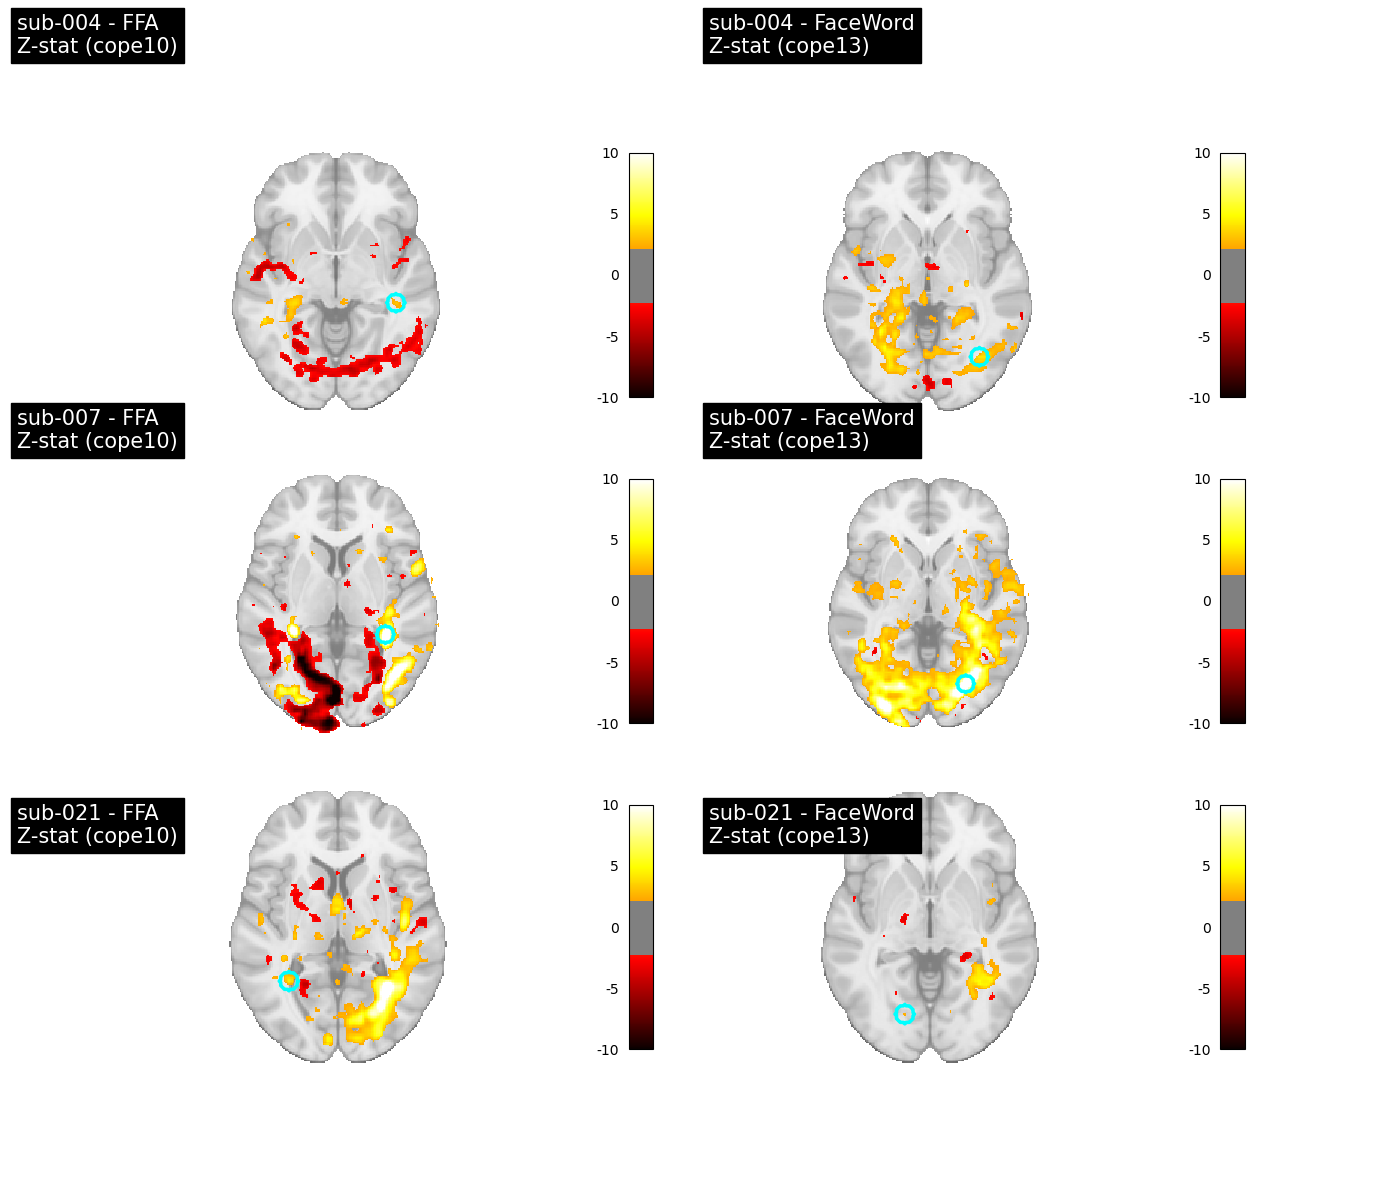

In [ ]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
from nilearn import plotting
import pandas as 

base = '/user_data/csimmon2/long_pt'
coords_df = pd.read_csv(f'{base}/analyses/functional_roi_spheres_niftimasker.csv')

rois_to_plot = ['FFA', 'FaceWord']
radius = 6

fig = plt.figure(figsize=(14, 12))

def create_sphere_mask(img, center_coords, radius_mm):
    data = img.get_fdata()
    affine = img.affine
    i, j, k = np.meshgrid(range(data.shape[0]), 
                          range(data.shape[1]),
                          range(data.shape[2]), indexing='ij')
    coords_voxel = np.column_stack([i.ravel(), j.ravel(), k.ravel()])
    coords_mm = nib.affines.apply_affine(affine, coords_voxel)
    distances = np.sqrt(np.sum((coords_mm - center_coords)**2, axis=1))
    sphere = (distances <= radius_mm).reshape(data.shape).astype(np.uint8)
    return nib.Nifti1Image(sphere, affine)

plot_idx = 1
for row, subject in enumerate(['sub-004', 'sub-007', 'sub-021']):
    for col, roi_name in enumerate(rois_to_plot):
        roi_data = coords_df[(coords_df['subject'] == subject) & 
                             (coords_df['roi'] == roi_name) & 
                             (coords_df['radius_mm'] == radius)]
        
        if roi_data.empty:
            plot_idx += 1
            continue
        
        cope_num = int(roi_data['cope'].values[0])
        peak_coords = np.array([
            roi_data['peak_x'].values[0], 
            roi_data['peak_y'].values[0], 
            roi_data['peak_z'].values[0]
        ])
        
        zstat_file = f'{base}/{subject}/ses-01/derivatives/fsl/loc/HighLevel.gfeat/cope{cope_num}.feat/stats/zstat1.nii.gz'
        zstat = nib.load(zstat_file)
        sphere_img = create_sphere_mask(zstat, peak_coords, radius)
        
        ax = plt.subplot(3, 2, plot_idx)
        
        display = plotting.plot_stat_map(
            zstat,
            threshold=2.3,
            vmax=10,
            display_mode='z',
            cut_coords=[peak_coords[2]],
            axes=ax,
            colorbar=True,
            cmap='hot',
            annotate=False,
            title=f'{subject} - {roi_name}\nZ-stat (cope{cope_num})'
        )
        
        display.add_contours(sphere_img, colors='cyan', linewidths=2.5, levels=[0.5])
        
        plot_idx += 1

plt.tight_layout()
plt.savefig(f'{base}/analyses/spheres_with_colorbar.png', dpi=150, bbox_inches='tight')
print("Saved visualization with colorbars")
print("\nColor legend:")
print("  Hot colormap = Z-statistic values (functional activation)")
print("  Cyan contour = 6mm sphere ROI boundary")

In [1]:
import nibabel as nib
import numpy as np
from nilearn.input_data import NiftiSpheresMasker
from scipy import ndimage
import pandas as pd
import os

base = '/user_data/csimmon2/long_pt'

print("="*70)
print("FUNCTIONAL ROI - BOTH HEMISPHERES, CLUSTER-BASED")
print("="*70)

subjects_config = {
    'sub-004': {'patient': 'UD', 'preserved_hemi': 'left'},
    'sub-007': {'patient': 'OT', 'preserved_hemi': 'left'},
    'sub-021': {'patient': 'TC', 'preserved_hemi': 'right'}
}

roi_definitions = {
    'FFA': {'cope': 10, 'contrast': 'face>scramble'},
    'PPA': {'cope': 11, 'contrast': 'house>scramble'},
    'VWFA': {'cope': 12, 'contrast': 'word>scramble'},
    'LOC': {'cope': 3, 'contrast': 'object>baseline'},
}

sphere_radii = [6, 8, 10]
min_cluster_size = 50  # voxels - peak must be in cluster of at least this size

all_results = []

for subject, config in subjects_config.items():
    
    print(f"\n{subject} ({config['patient']}, preserved: {config['preserved_hemi']}):")
    print("="*70)
    
    # Load brain mask
    brain_mask = nib.load(f'{base}/{subject}/ses-01/anat/{subject}_ses-01_T1w_brain_mask.nii.gz')
    brain_data = brain_mask.get_fdata()
    affine = brain_mask.affine
    
    # Create coordinate grid
    i, j, k = np.meshgrid(range(brain_data.shape[0]), 
                          range(brain_data.shape[1]),
                          range(brain_data.shape[2]), indexing='ij')
    coords_voxel = np.column_stack([i.ravel(), j.ravel(), k.ravel()])
    coords_mm = nib.affines.apply_affine(affine, coords_voxel)
    coords_mm = coords_mm.reshape(brain_data.shape + (3,))
    
    # Create BOTH hemisphere masks
    for hemi in ['left', 'right']:
        
        print(f"\n{hemi.upper()} HEMISPHERE:")
        print("-"*70)
        
        # Anatomical constraint: ventral temporal/occipital + hemisphere
        if hemi == 'left':
            hemi_constraint = (coords_mm[..., 0] < -5)  # X < -5 for left
        else:
            hemi_constraint = (coords_mm[..., 0] > 5)   # X > 5 for right
        
        anat_constraint = (hemi_constraint &
                          (coords_mm[..., 1] > -100) &
                          (coords_mm[..., 1] < 10) &
                          (coords_mm[..., 2] > -50) &
                          (coords_mm[..., 2] < 20) &
                          (brain_data > 0)).astype(int)
        
        n_anat = np.sum(anat_constraint)
        print(f"  Anatomical constraint: {n_anat} voxels")
        
        # Functional selectivity within anatomical constraint
        category_copes = [1, 2, 3, 4]
        combined_mask = np.zeros_like(brain_data, dtype=int)
        
        for cope_num in category_copes:
            zstat_file = f'{base}/{subject}/ses-01/derivatives/fsl/loc/HighLevel.gfeat/cope{cope_num}.feat/stats/zstat1.nii.gz'
            if os.path.exists(zstat_file):
                zstat = nib.load(zstat_file)
                z_data = zstat.get_fdata()
                
                category_mask = ((z_data > 2.3) & (anat_constraint > 0)).astype(int)
                combined_mask = (combined_mask | category_mask).astype(int)
        
        n_functional = np.sum(combined_mask > 0)
        print(f"  Functionally selective: {n_functional} voxels")
        
        # Find peaks for each ROI
        for roi_name, roi_info in roi_definitions.items():
            cope_num = roi_info['cope']
            
            zstat_file = f'{base}/{subject}/ses-01/derivatives/fsl/loc/HighLevel.gfeat/cope{cope_num}.feat/stats/zstat1.nii.gz'
            
            if not os.path.exists(zstat_file):
                continue
            
            zstat = nib.load(zstat_file)
            z_data = zstat.get_fdata()
            
            # Threshold and find clusters
            thresholded = (z_data > 2.3) & (combined_mask > 0)
            labeled, num_clusters = ndimage.label(thresholded)
            
            if num_clusters == 0:
                print(f"    {roi_name}: No clusters found")
                continue
            
            # Find largest cluster
            cluster_sizes = ndimage.sum(thresholded, labeled, range(1, num_clusters + 1))
            largest_cluster_id = np.argmax(cluster_sizes) + 1
            largest_cluster_size = int(cluster_sizes[largest_cluster_id - 1])
            
            if largest_cluster_size < min_cluster_size:
                print(f"    {roi_name}: Largest cluster too small ({largest_cluster_size} < {min_cluster_size})")
                continue
            
            # Find peak within largest cluster
            cluster_mask = labeled == largest_cluster_id
            z_in_cluster = z_data * cluster_mask
            peak_idx = np.unravel_index(np.argmax(z_in_cluster), z_in_cluster.shape)
            peak_value = z_in_cluster[peak_idx]
            peak_coords_mm = nib.affines.apply_affine(affine, peak_idx)
            
            print(f"\n    {roi_name}:")
            print(f"      Cluster size: {largest_cluster_size} voxels")
            print(f"      Peak: ({peak_coords_mm[0]:.1f}, {peak_coords_mm[1]:.1f}, {peak_coords_mm[2]:.1f})")
            print(f"      Peak Z: {peak_value:.2f}")
            
            # Test sphere sizes
            for radius in sphere_radii:
                masker = NiftiSpheresMasker(
                    seeds=[tuple(peak_coords_mm)],
                    radius=radius,
                    standardize=False,
                    detrend=False
                )
                
                masker.fit()
                mean_z = masker.transform(zstat).mean()
                print(f"        {radius}mm sphere: mean z={mean_z:.2f}")
                
                all_results.append({
                    'subject': subject,
                    'patient': config['patient'],
                    'preserved_hemi': config['preserved_hemi'],
                    'roi_hemisphere': hemi,
                    'roi': roi_name,
                    'cope': cope_num,
                    'cluster_size': largest_cluster_size,
                    'peak_x': peak_coords_mm[0],
                    'peak_y': peak_coords_mm[1],
                    'peak_z': peak_coords_mm[2],
                    'peak_z_value': peak_value,
                    'radius_mm': radius,
                    'mean_z': mean_z
                })

# Save
results_df = pd.DataFrame(all_results)
results_df.to_csv(f'{base}/analyses/functional_roi_both_hemispheres.csv', index=False)

print(f"\n{'='*70}")
print("Saved: functional_roi_both_hemispheres.csv")
print("="*70)

# Show summary
print("\nSUMMARY - ROIs found in each hemisphere:")
for subj in results_df['subject'].unique():
    print(f"\n{subj}:")
    subj_data = results_df[results_df['subject'] == subj]
    for hemi in ['left', 'right']:
        hemi_rois = subj_data[(subj_data['roi_hemisphere'] == hemi) & (subj_data['radius_mm'] == 6)]
        if len(hemi_rois) > 0:
            print(f"  {hemi}: {', '.join(hemi_rois['roi'].unique())}")

/home/csimmon2/anaconda3/envs/fmri/lib/python3.9/site-packages/nilearn/input_data/__init__.py:23: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)


FUNCTIONAL ROI - BOTH HEMISPHERES, CLUSTER-BASED

sub-004 (UD, preserved: left):

LEFT HEMISPHERE:
----------------------------------------------------------------------
  Anatomical constraint: 191310 voxels
  Functionally selective: 10247 voxels

    FFA:
      Cluster size: 499 voxels
      Peak: (-24.5, -33.0, -8.0)
      Peak Z: 4.21
        6mm sphere: mean z=2.29
        8mm sphere: mean z=1.73
        10mm sphere: mean z=1.18

    PPA:
      Cluster size: 202 voxels
      Peak: (-20.5, -42.0, 11.0)
      Peak Z: 4.42
        6mm sphere: mean z=1.50
        8mm sphere: mean z=0.86
        10mm sphere: mean z=0.36

    VWFA:
      Cluster size: 118 voxels
      Peak: (-27.5, -22.0, 11.0)
      Peak Z: 4.29
        6mm sphere: mean z=0.99
        8mm sphere: mean z=0.14
        10mm sphere: mean z=-0.43

    LOC:
      Cluster size: 2736 voxels
      Peak: (-28.5, 8.0, 15.0)
      Peak Z: 4.72
        6mm sphere: mean z=2.73
        8mm sphere: mean z=1.98
        10mm sphere: mea

In [2]:
#!/usr/bin/env python3
"""
Visualize Functional ROI Results
Comprehensive visualization of functional ROI extraction across subjects, hemispheres, and radii
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

def load_roi_data(csv_path):
    """Load the functional ROI CSV data"""
    df = pd.read_csv(csv_path)
    print(f"Loaded {len(df)} ROI measurements")
    print(f"Subjects: {df['subject'].unique()}")
    print(f"ROIs: {df['roi'].unique()}")
    print(f"Radii: {df['radius_mm'].unique()}")
    return df

def plot_spatial_distribution(df, output_dir):
    """
    Plot spatial distribution of ROIs similar to Liu's Fig 2
    Separate plots for each subject and hemisphere
    """
    subjects = df['subject'].unique()
    roi_colors = {
        'FFA': '#FF1493',      # Magenta - faces
        'PPA': '#228B22',      # Dark green - houses
        'LOC': '#87CEEB',      # Light blue - objects
        'VWFA': '#FF8C00',     # Dark orange - words
    }
    
    # Use 6mm radius for spatial plotting (smallest, most specific)
    df_6mm = df[df['radius_mm'] == 6].copy()
    
    fig, axes = plt.subplots(len(subjects), 2, figsize=(14, 5*len(subjects)))
    if len(subjects) == 1:
        axes = axes.reshape(1, -1)
    
    for i, subject in enumerate(subjects):
        subj_data = df_6mm[df_6mm['subject'] == subject]
        patient_id = subj_data['patient'].iloc[0]
        preserved = subj_data['preserved_hemi'].iloc[0]
        
        for j, hemi in enumerate(['left', 'right']):
            ax = axes[i, j]
            hemi_data = subj_data[subj_data['roi_hemisphere'] == hemi]
            
            # Plot each ROI
            for roi in hemi_data['roi'].unique():
                roi_data = hemi_data[hemi_data['roi'] == roi]
                if len(roi_data) > 0:
                    ax.scatter(roi_data['peak_x'], roi_data['peak_y'], 
                             s=500, c=roi_colors.get(roi, 'gray'),
                             label=roi, edgecolors='black', linewidths=2,
                             alpha=0.8, zorder=3)
            
            # Formatting
            ax.set_xlabel('X (L-R)', fontsize=12, fontweight='bold')
            ax.set_ylabel('Y (P-A)', fontsize=12, fontweight='bold')
            ax.set_title(f'{subject} ({patient_id}) - {hemi.upper()} hemisphere\n'
                        f'{"[PRESERVED]" if hemi == preserved else "[RESECTED]"}',
                        fontsize=13, fontweight='bold')
            ax.axvline(x=0, color='gray', linestyle='--', alpha=0.3)
            ax.axhline(y=0, color='gray', linestyle='--', alpha=0.3)
            ax.grid(True, alpha=0.3)
            
            # Only show legend if there are ROIs
            if len(hemi_data) > 0:
                ax.legend(loc='best', fontsize=10)
            else:
                ax.text(0.5, 0.5, 'No ROIs found', 
                       ha='center', va='center', 
                       transform=ax.transAxes,
                       fontsize=14, style='italic', color='gray')
    
    plt.tight_layout()
    plt.savefig(output_dir / 'spatial_distribution_all_subjects.png', 
                dpi=300, bbox_inches='tight')
    print(f"Saved: spatial_distribution_all_subjects.png")
    plt.close()

def plot_cluster_sizes(df, output_dir):
    """Plot cluster sizes for each ROI type across subjects and hemispheres"""
    df_6mm = df[df['radius_mm'] == 6].copy()
    
    fig, ax = plt.subplots(figsize=(14, 6))
    
    # Prepare data for plotting
    plot_data = []
    for _, row in df_6mm.iterrows():
        plot_data.append({
            'Subject': row['patient'],
            'ROI': f"{row['roi_hemisphere'][0].upper()}-{row['roi']}",
            'Cluster Size': row['cluster_size'],
            'Hemisphere': row['roi_hemisphere']
        })
    
    plot_df = pd.DataFrame(plot_data)
    
    # Create grouped bar plot
    sns.barplot(data=plot_df, x='ROI', y='Cluster Size', hue='Subject', ax=ax)
    
    ax.set_xlabel('ROI', fontsize=12, fontweight='bold')
    ax.set_ylabel('Cluster Size (voxels)', fontsize=12, fontweight='bold')
    ax.set_title('Functional Cluster Sizes by ROI and Subject', 
                 fontsize=14, fontweight='bold')
    ax.legend(title='Patient', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45, ha='right')
    ax.grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.savefig(output_dir / 'cluster_sizes_by_roi.png', 
                dpi=300, bbox_inches='tight')
    print(f"Saved: cluster_sizes_by_roi.png")
    plt.close()

def plot_peak_z_values(df, output_dir):
    """Plot peak Z-values for each ROI across subjects"""
    df_6mm = df[df['radius_mm'] == 6].copy()
    
    fig, ax = plt.subplots(figsize=(14, 6))
    
    # Prepare data
    plot_data = []
    for _, row in df_6mm.iterrows():
        plot_data.append({
            'Subject': row['patient'],
            'ROI': f"{row['roi_hemisphere'][0].upper()}-{row['roi']}",
            'Peak Z': row['peak_z_value'],
        })
    
    plot_df = pd.DataFrame(plot_data)
    
    # Create grouped bar plot
    sns.barplot(data=plot_df, x='ROI', y='Peak Z', hue='Subject', ax=ax)
    
    ax.axhline(y=2.3, color='red', linestyle='--', linewidth=2, 
               label='Threshold (Z=2.3)', alpha=0.7)
    ax.set_xlabel('ROI', fontsize=12, fontweight='bold')
    ax.set_ylabel('Peak Z-value', fontsize=12, fontweight='bold')
    ax.set_title('Peak Z-values by ROI and Subject', 
                 fontsize=14, fontweight='bold')
    ax.legend(title='Patient', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45, ha='right')
    ax.grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.savefig(output_dir / 'peak_z_values_by_roi.png', 
                dpi=300, bbox_inches='tight')
    print(f"Saved: peak_z_values_by_roi.png")
    plt.close()

def plot_radius_effects(df, output_dir):
    """
    Plot how mean Z changes with sphere radius
    This is KEY to your methodological question about radius selection
    """
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    axes = axes.flatten()
    
    roi_types = ['FFA', 'PPA', 'LOC', 'VWFA']
    
    for idx, roi in enumerate(roi_types):
        ax = axes[idx]
        roi_data = df[df['roi'] == roi]
        
        if len(roi_data) == 0:
            ax.text(0.5, 0.5, f'No {roi} data', 
                   ha='center', va='center', 
                   transform=ax.transAxes,
                   fontsize=14, style='italic')
            continue
        
        # Plot each subject's ROI across radii
        for subject in roi_data['subject'].unique():
            subj_roi_data = roi_data[roi_data['subject'] == subject]
            patient_id = subj_roi_data['patient'].iloc[0]
            
            # Separate by hemisphere
            for hemi in subj_roi_data['roi_hemisphere'].unique():
                hemi_data = subj_roi_data[subj_roi_data['roi_hemisphere'] == hemi]
                hemi_data = hemi_data.sort_values('radius_mm')
                
                marker = 'o' if hemi == 'left' else 's'
                label = f"{patient_id}-{hemi[0].upper()}"
                
                ax.plot(hemi_data['radius_mm'], hemi_data['mean_z'],
                       marker=marker, linewidth=2, markersize=10,
                       label=label, alpha=0.8)
        
        ax.set_xlabel('Sphere Radius (mm)', fontsize=12, fontweight='bold')
        ax.set_ylabel('Mean Z-value', fontsize=12, fontweight='bold')
        ax.set_title(f'{roi}: Effect of Sphere Size', 
                     fontsize=13, fontweight='bold')
        ax.legend(loc='best', fontsize=9)
        ax.grid(True, alpha=0.3)
        ax.set_xticks([6, 8, 10])
    
    plt.suptitle('How Sphere Radius Affects Mean Activation\n'
                 '(Larger spheres include more peripheral voxels)',
                 fontsize=15, fontweight='bold', y=0.995)
    plt.tight_layout()
    plt.savefig(output_dir / 'radius_effects_on_activation.png', 
                dpi=300, bbox_inches='tight')
    print(f"Saved: radius_effects_on_activation.png")
    plt.close()

def plot_hemisphere_comparison(df, output_dir):
    """
    Compare ROI presence between preserved and resected hemispheres
    """
    df_6mm = df[df['radius_mm'] == 6].copy()
    
    fig, axes = plt.subplots(1, len(df_6mm['subject'].unique()), 
                            figsize=(6*len(df_6mm['subject'].unique()), 6))
    
    if len(df_6mm['subject'].unique()) == 1:
        axes = [axes]
    
    for idx, subject in enumerate(df_6mm['subject'].unique()):
        ax = axes[idx]
        subj_data = df_6mm[df_6mm['subject'] == subject]
        patient_id = subj_data['patient'].iloc[0]
        preserved = subj_data['preserved_hemi'].iloc[0]
        
        # Count ROIs by hemisphere
        roi_counts = subj_data.groupby(['roi_hemisphere', 'roi']).size().unstack(fill_value=0)
        
        roi_counts.plot(kind='bar', ax=ax, width=0.8)
        
        ax.set_xlabel('Hemisphere', fontsize=12, fontweight='bold')
        ax.set_ylabel('Number of ROIs', fontsize=12, fontweight='bold')
        ax.set_title(f'{subject} ({patient_id})\nPreserved: {preserved}', 
                     fontsize=13, fontweight='bold')
        ax.legend(title='ROI', bbox_to_anchor=(1.05, 1), loc='upper left')
        ax.set_xticklabels([label.get_text().upper() for label in ax.get_xticklabels()], 
                          rotation=0)
        ax.grid(True, alpha=0.3, axis='y')
        
        # Add annotation for preserved hemisphere
        for i, hemi in enumerate(['left', 'right']):
            if hemi == preserved:
                ax.text(i, ax.get_ylim()[1]*0.95, '★ PRESERVED', 
                       ha='center', fontsize=10, fontweight='bold',
                       color='green')
    
    plt.tight_layout()
    plt.savefig(output_dir / 'hemisphere_roi_comparison.png', 
                dpi=300, bbox_inches='tight')
    print(f"Saved: hemisphere_roi_comparison.png")
    plt.close()

def create_summary_table(df, output_dir):
    """Create a summary table of ROI findings"""
    df_6mm = df[df['radius_mm'] == 6].copy()
    
    summary_rows = []
    for subject in df_6mm['subject'].unique():
        subj_data = df_6mm[df_6mm['subject'] == subject]
        patient_id = subj_data['patient'].iloc[0]
        preserved = subj_data['preserved_hemi'].iloc[0]
        
        for hemi in ['left', 'right']:
            hemi_data = subj_data[subj_data['roi_hemisphere'] == hemi]
            
            row = {
                'Subject': subject,
                'Patient': patient_id,
                'Hemisphere': hemi,
                'Status': 'PRESERVED' if hemi == preserved else 'RESECTED',
                'N_ROIs': len(hemi_data),
                'ROIs_Found': ', '.join(sorted(hemi_data['roi'].unique())),
                'Mean_Cluster_Size': hemi_data['cluster_size'].mean() if len(hemi_data) > 0 else 0,
                'Mean_Peak_Z': hemi_data['peak_z_value'].mean() if len(hemi_data) > 0 else 0,
            }
            summary_rows.append(row)
    
    summary_df = pd.DataFrame(summary_rows)
    summary_df = summary_df.round(2)
    
    # Save as CSV
    summary_df.to_csv(output_dir / 'roi_summary_table.csv', index=False)
    print(f"Saved: roi_summary_table.csv")
    
    # Create a nice formatted table plot
    fig, ax = plt.subplots(figsize=(16, len(summary_rows)*0.6))
    ax.axis('tight')
    ax.axis('off')
    
    # Create table
    table = ax.table(cellText=summary_df.values,
                    colLabels=summary_df.columns,
                    cellLoc='left',
                    loc='center',
                    colWidths=[0.1, 0.08, 0.1, 0.1, 0.08, 0.25, 0.12, 0.12])
    
    table.auto_set_font_size(False)
    table.set_fontsize(9)
    table.scale(1, 2)
    
    # Color code by status
    for i, row in enumerate(summary_df.itertuples(index=False), start=1):
        if row.Status == 'PRESERVED':
            table[(i, 3)].set_facecolor('#90EE90')  # Light green
        else:
            table[(i, 3)].set_facecolor('#FFB6C6')  # Light red
    
    # Header formatting
    for i in range(len(summary_df.columns)):
        table[(0, i)].set_facecolor('#4472C4')
        table[(0, i)].set_text_props(weight='bold', color='white')
    
    plt.title('Functional ROI Summary (6mm radius)', 
             fontsize=14, fontweight='bold', pad=20)
    plt.savefig(output_dir / 'roi_summary_table.png', 
                dpi=300, bbox_inches='tight')
    print(f"Saved: roi_summary_table.png")
    plt.close()
    
    return summary_df

def main():
    """Main visualization pipeline"""
    
    # Paths - adjust as needed
    base = Path('/user_data/csimmon2/long_pt')
    csv_path = base / 'analyses' / 'functional_roi_both_hemispheres.csv'
    output_dir = base / 'analyses' / 'figures'
    output_dir.mkdir(parents=True, exist_ok=True)
    
    print("="*70)
    print("FUNCTIONAL ROI VISUALIZATION")
    print("="*70)
    
    # Load data
    df = load_roi_data(csv_path)
    print(f"\nTotal measurements: {len(df)}")
    print(f"Unique ROI instances (6mm): {len(df[df['radius_mm']==6])}")
    
    # Create visualizations
    print("\nGenerating visualizations...")
    print("-"*70)
    
    plot_spatial_distribution(df, output_dir)
    plot_cluster_sizes(df, output_dir)
    plot_peak_z_values(df, output_dir)
    plot_radius_effects(df, output_dir)
    plot_hemisphere_comparison(df, output_dir)
    summary_df = create_summary_table(df, output_dir)
    
    print("\n" + "="*70)
    print("SUMMARY")
    print("="*70)
    print(summary_df.to_string(index=False))
    
    print("\n" + "="*70)
    print(f"All visualizations saved to: {output_dir}")
    print("="*70)

if __name__ == "__main__":
    main()

FUNCTIONAL ROI VISUALIZATION
Loaded 72 ROI measurements
Subjects: ['sub-004' 'sub-007' 'sub-021']
ROIs: ['FFA' 'PPA' 'VWFA' 'LOC']
Radii: [ 6  8 10]

Total measurements: 72
Unique ROI instances (6mm): 24

Generating visualizations...
----------------------------------------------------------------------
Saved: spatial_distribution_all_subjects.png
Saved: cluster_sizes_by_roi.png
Saved: peak_z_values_by_roi.png
Saved: radius_effects_on_activation.png
Saved: hemisphere_roi_comparison.png
Saved: roi_summary_table.csv
Saved: roi_summary_table.png

SUMMARY
Subject Patient Hemisphere    Status  N_ROIs          ROIs_Found  Mean_Cluster_Size  Mean_Peak_Z
sub-004      UD       left PRESERVED       4 FFA, LOC, PPA, VWFA             888.75         4.41
sub-004      UD      right  RESECTED       4 FFA, LOC, PPA, VWFA             110.25         3.83
sub-007      OT       left PRESERVED       4 FFA, LOC, PPA, VWFA            8224.75        12.05
sub-007      OT      right  RESECTED       4 FFA, LOC,

In [3]:
#!/usr/bin/env python3
"""
Visualize Functional ROIs Overlaid on Activation Maps
Shows the actual functional data with ROI spheres overlaid

This addresses the question: WHY do cluster sizes vary so dramatically?
"""

import pandas as pd
import numpy as np
import nibabel as nib
from pathlib import Path
from nilearn import plotting, image
from nilearn.plotting import plot_stat_map, plot_roi, plot_glass_brain
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

class FunctionalROIVisualizer:
    def __init__(self, base_dir, roi_csv):
        self.base_dir = Path(base_dir)
        self.roi_df = pd.read_csv(roi_csv)
        
        # Use 6mm radius for visualization (most specific)
        self.roi_df = self.roi_df[self.roi_df['radius_mm'] == 6].copy()
        
        # Subject configuration
        self.subjects_config = {
            'sub-004': {'patient': 'UD', 'preserved_hemi': 'left'},
            'sub-007': {'patient': 'OT', 'preserved_hemi': 'left'},
            'sub-021': {'patient': 'TC', 'preserved_hemi': 'right'}
        }
        
        # Cope to contrast mapping
        self.cope_to_contrast = {
            10: 'face>scramble',
            11: 'house>scramble',
            12: 'word>scramble',
            3: 'object>baseline',
            13: 'cope13',  # Update when you know what this is
            14: 'cope14',  # Update when you know what this is
        }
    
    def create_roi_sphere_mask(self, peak_coords, radius_mm, reference_img):
        """Create a spherical ROI mask"""
        from nilearn.image import new_img_like
        from scipy.ndimage import distance_transform_edt
        
        # Get image properties
        data = reference_img.get_fdata()
        affine = reference_img.affine
        
        # Create coordinate grids
        shape = data.shape
        coords_grid = np.mgrid[0:shape[0], 0:shape[1], 0:shape[2]]
        
        # Convert voxel coordinates to mm
        coords_flat = np.vstack([coords_grid[0].ravel(), 
                                 coords_grid[1].ravel(), 
                                 coords_grid[2].ravel(),
                                 np.ones(coords_grid[0].size)])
        world_coords = affine.dot(coords_flat)[:3, :].T
        world_coords = world_coords.reshape(shape + (3,))
        
        # Calculate distance from peak
        distances = np.sqrt(
            (world_coords[..., 0] - peak_coords[0])**2 +
            (world_coords[..., 1] - peak_coords[1])**2 +
            (world_coords[..., 2] - peak_coords[2])**2
        )
        
        # Create sphere mask
        sphere_mask = (distances <= radius_mm).astype(float)
        
        return new_img_like(reference_img, sphere_mask)
    
    def plot_roi_on_functional(self, subject, roi_name, hemisphere, output_dir):
        """
        Plot a single ROI overlaid on its functional contrast map
        
        This shows:
        1. The functional activation map (zstat)
        2. The ROI sphere overlaid
        3. Why cluster sizes might vary (extent of activation)
        """
        # Get ROI info
        roi_data = self.roi_df[
            (self.roi_df['subject'] == subject) & 
            (self.roi_df['roi'] == roi_name) &
            (self.roi_df['roi_hemisphere'] == hemisphere)
        ]
        
        if len(roi_data) == 0:
            print(f"  No {roi_name} found in {hemisphere} hemisphere for {subject}")
            return
        
        roi_row = roi_data.iloc[0]
        cope_num = roi_row['cope']
        peak_coords = (roi_row['peak_x'], roi_row['peak_y'], roi_row['peak_z'])
        patient_id = roi_row['patient']
        
        # Load the zstat map
        zstat_path = (self.base_dir / subject / 'ses-01' / 'derivatives' / 'fsl' / 
                     'loc' / 'HighLevel.gfeat' / f'cope{cope_num}.feat' / 
                     'stats' / 'zstat1.nii.gz')
        
        if not zstat_path.exists():
            print(f"  Warning: {zstat_path} does not exist")
            return
        
        zstat_img = nib.load(zstat_path)
        
        # Create ROI sphere mask
        roi_sphere = self.create_roi_sphere_mask(peak_coords, 6.0, zstat_img)
        
        # Create figure with multiple views
        fig = plt.figure(figsize=(20, 12))
        
        # Glass brain view
        ax1 = plt.subplot(2, 3, 1)
        plotting.plot_glass_brain(
            zstat_img, 
            threshold=2.3,
            title=f'{subject} ({patient_id}): {roi_name}-{hemisphere[0].upper()}\n'
                  f'Glass Brain - {self.cope_to_contrast.get(cope_num, f"cope{cope_num}")}',
            axes=ax1,
            plot_abs=False,
            colorbar=True,
            vmax=8
        )
        
        # Sagittal view
        ax2 = plt.subplot(2, 3, 2)
        display = plotting.plot_stat_map(
            zstat_img,
            threshold=2.3,
            title=f'Sagittal (X={peak_coords[0]:.1f})',
            cut_coords=[peak_coords[0]],
            display_mode='x',
            axes=ax2,
            colorbar=True,
            vmax=8
        )
        display.add_contours(roi_sphere, levels=[0.5], colors='lime', linewidths=2)
        
        # Coronal view
        ax3 = plt.subplot(2, 3, 3)
        display = plotting.plot_stat_map(
            zstat_img,
            threshold=2.3,
            title=f'Coronal (Y={peak_coords[1]:.1f})',
            cut_coords=[peak_coords[1]],
            display_mode='y',
            axes=ax3,
            colorbar=True,
            vmax=8
        )
        display.add_contours(roi_sphere, levels=[0.5], colors='lime', linewidths=2)
        
        # Axial view
        ax4 = plt.subplot(2, 3, 4)
        display = plotting.plot_stat_map(
            zstat_img,
            threshold=2.3,
            title=f'Axial (Z={peak_coords[2]:.1f})',
            cut_coords=[peak_coords[2]],
            display_mode='z',
            axes=ax4,
            colorbar=True,
            vmax=8
        )
        display.add_contours(roi_sphere, levels=[0.5], colors='lime', linewidths=2)
        
        # Multi-slice mosaic view
        ax5 = plt.subplot(2, 3, (5, 6))
        display = plotting.plot_stat_map(
            zstat_img,
            threshold=2.3,
            title=f'Multi-slice View (around peak)',
            display_mode='z',
            cut_coords=np.arange(peak_coords[2]-15, peak_coords[2]+15, 5),
            axes=ax5,
            colorbar=True,
            vmax=8
        )
        
        # Add ROI information
        info_text = (
            f"ROI: {roi_name} ({hemisphere} hemisphere)\n"
            f"Peak: ({peak_coords[0]:.1f}, {peak_coords[1]:.1f}, {peak_coords[2]:.1f})\n"
            f"Peak Z: {roi_row['peak_z_value']:.2f}\n"
            f"Cluster size: {roi_row['cluster_size']:.0f} voxels\n"
            f"Mean Z (6mm): {roi_row['mean_z']:.2f}\n"
            f"Hemisphere: {'PRESERVED' if hemisphere == roi_row['preserved_hemi'] else 'RESECTED'}"
        )
        fig.text(0.02, 0.98, info_text, va='top', fontsize=11, 
                family='monospace', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
        
        plt.tight_layout()
        
        # Save
        output_file = output_dir / f'{subject}_{patient_id}_{roi_name}_{hemisphere}_functional.png'
        plt.savefig(output_file, dpi=200, bbox_inches='tight')
        print(f"  Saved: {output_file.name}")
        plt.close()
    
    def plot_all_rois_on_functional(self, subject, output_dir):
        """
        Create combined view of all ROIs for a subject on their functional data
        """
        subj_rois = self.roi_df[self.roi_df['subject'] == subject]
        patient_id = self.subjects_config[subject]['patient']
        preserved = self.subjects_config[subject]['preserved_hemi']
        
        if len(subj_rois) == 0:
            print(f"  No ROIs for {subject}")
            return
        
        # Group by cope to create one plot per contrast
        for cope_num in subj_rois['cope'].unique():
            cope_rois = subj_rois[subj_rois['cope'] == cope_num]
            
            # Load zstat
            zstat_path = (self.base_dir / subject / 'ses-01' / 'derivatives' / 'fsl' / 
                         'loc' / 'HighLevel.gfeat' / f'cope{cope_num}.feat' / 
                         'stats' / 'zstat1.nii.gz')
            
            if not zstat_path.exists():
                continue
            
            zstat_img = nib.load(zstat_path)
            
            # Create combined ROI mask
            combined_mask = np.zeros(zstat_img.shape)
            roi_list = []
            
            for _, roi_row in cope_rois.iterrows():
                peak_coords = (roi_row['peak_x'], roi_row['peak_y'], roi_row['peak_z'])
                roi_sphere = self.create_roi_sphere_mask(peak_coords, 6.0, zstat_img)
                combined_mask += roi_sphere.get_fdata()
                
                hemi = roi_row['roi_hemisphere']
                roi_list.append(f"{roi_row['roi']}-{hemi[0].upper()}")
            
            combined_roi_img = nib.Nifti1Image(combined_mask, zstat_img.affine)
            
            # Plot
            fig = plt.figure(figsize=(20, 10))
            
            # Glass brain
            ax1 = plt.subplot(2, 2, 1)
            plotting.plot_glass_brain(
                zstat_img,
                threshold=2.3,
                title=f'{subject} ({patient_id}) - All ROIs\n{self.cope_to_contrast.get(cope_num, f"cope{cope_num}")}',
                axes=ax1,
                colorbar=True,
                vmax=8
            )
            
            # Overlay all ROIs on sagittal
            ax2 = plt.subplot(2, 2, 2)
            display = plotting.plot_stat_map(
                zstat_img,
                threshold=2.3,
                title='Sagittal View with All ROIs',
                display_mode='x',
                cut_coords=5,
                axes=ax2,
                colorbar=True,
                vmax=8
            )
            display.add_contours(combined_roi_img, levels=[0.5], colors='lime', linewidths=2)
            
            # Coronal
            ax3 = plt.subplot(2, 2, 3)
            display = plotting.plot_stat_map(
                zstat_img,
                threshold=2.3,
                title='Coronal View with All ROIs',
                display_mode='y',
                cut_coords=5,
                axes=ax3,
                colorbar=True,
                vmax=8
            )
            display.add_contours(combined_roi_img, levels=[0.5], colors='lime', linewidths=2)
            
            # Axial
            ax4 = plt.subplot(2, 2, 4)
            display = plotting.plot_stat_map(
                zstat_img,
                threshold=2.3,
                title='Axial View with All ROIs',
                display_mode='z',
                cut_coords=5,
                axes=ax4,
                colorbar=True,
                vmax=8
            )
            display.add_contours(combined_roi_img, levels=[0.5], colors='lime', linewidths=2)
            
            # Add info
            info_text = f"ROIs: {', '.join(roi_list)}\nPreserved: {preserved}"
            fig.text(0.02, 0.98, info_text, va='top', fontsize=11,
                    family='monospace', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
            
            plt.tight_layout()
            
            output_file = output_dir / f'{subject}_{patient_id}_ALL_ROIs_cope{cope_num}_functional.png'
            plt.savefig(output_file, dpi=200, bbox_inches='tight')
            print(f"  Saved: {output_file.name}")
            plt.close()
    
    def create_cluster_size_explanation_plots(self, output_dir):
        """
        Create plots that explain why cluster sizes vary
        Shows thresholded activation extent for each subject/ROI
        """
        fig, axes = plt.subplots(len(self.subjects_config), 4, figsize=(20, 5*len(self.subjects_config)))
        
        if len(self.subjects_config) == 1:
            axes = axes.reshape(1, -1)
        
        subjects = list(self.subjects_config.keys())
        roi_types = ['FFA', 'PPA', 'LOC', 'VWFA']
        
        for i, subject in enumerate(subjects):
            patient_id = self.subjects_config[subject]['patient']
            
            for j, roi_name in enumerate(roi_types):
                ax = axes[i, j]
                
                # Get ROI data for this subject
                roi_data = self.roi_df[
                    (self.roi_df['subject'] == subject) & 
                    (self.roi_df['roi'] == roi_name)
                ]
                
                if len(roi_data) == 0:
                    ax.text(0.5, 0.5, f'No {roi_name}', ha='center', va='center',
                           transform=ax.transAxes, fontsize=12)
                    ax.set_title(f'{patient_id}: {roi_name}')
                    continue
                
                # Plot cluster sizes by hemisphere
                cluster_sizes = []
                labels = []
                colors = []
                
                for _, roi_row in roi_data.iterrows():
                    cluster_sizes.append(roi_row['cluster_size'])
                    hemi = roi_row['roi_hemisphere']
                    labels.append(hemi[0].upper())
                    
                    # Color by preserved/resected
                    if hemi == roi_row['preserved_hemi']:
                        colors.append('green')
                    else:
                        colors.append('red')
                
                bars = ax.bar(labels, cluster_sizes, color=colors, alpha=0.7, edgecolor='black')
                ax.set_ylabel('Cluster Size (voxels)', fontsize=10)
                ax.set_title(f'{patient_id}: {roi_name}\n(Green=Preserved, Red=Resected)', fontsize=10)
                ax.grid(True, alpha=0.3, axis='y')
                
                # Add values on bars
                for bar, val in zip(bars, cluster_sizes):
                    height = bar.get_height()
                    ax.text(bar.get_x() + bar.get_width()/2., height,
                           f'{int(val)}',
                           ha='center', va='bottom', fontsize=9)
        
        plt.suptitle('Cluster Size Variations: Why Do They Differ?\n'
                    '(Larger clusters = more extensive functional activation)', 
                    fontsize=14, fontweight='bold')
        plt.tight_layout()
        
        output_file = output_dir / 'cluster_size_explanation.png'
        plt.savefig(output_file, dpi=200, bbox_inches='tight')
        print(f"Saved: {output_file.name}")
        plt.close()
    
    def run_all_visualizations(self, output_dir):
        """Generate all functional visualizations"""
        output_dir = Path(output_dir)
        output_dir.mkdir(parents=True, exist_ok=True)
        
        print("="*70)
        print("FUNCTIONAL ROI VISUALIZATION (on activation maps)")
        print("="*70)
        
        # Individual ROI plots
        print("\nGenerating individual ROI plots...")
        for subject in self.subjects_config.keys():
            print(f"\n{subject}:")
            
            # Plot each ROI individually
            for roi_name in self.roi_df['roi'].unique():
                for hemisphere in ['left', 'right']:
                    self.plot_roi_on_functional(subject, roi_name, hemisphere, output_dir)
            
            # Plot all ROIs together
            print(f"  Creating combined view...")
            self.plot_all_rois_on_functional(subject, output_dir)
        
        # Cluster size explanation
        print("\nCreating cluster size explanation plot...")
        self.create_cluster_size_explanation_plots(output_dir)
        
        print("\n" + "="*70)
        print(f"All functional visualizations saved to: {output_dir}")
        print("="*70)
        print("\nThese visualizations show:")
        print("1. ROI spheres overlaid on actual activation maps")
        print("2. Why cluster sizes vary (extent of thresholded activation)")
        print("3. Whether ROIs are in reasonable anatomical locations")
        print("4. Comparison between preserved and resected hemispheres")


def main():
    """Main execution"""
    base = Path('/user_data/csimmon2/long_pt')
    roi_csv = base / 'analyses' / 'functional_roi_both_hemispheres.csv'
    output_dir = base / 'analyses' / 'figures' / 'functional_overlays'
    
    visualizer = FunctionalROIVisualizer(base, roi_csv)
    visualizer.run_all_visualizations(output_dir)


if __name__ == "__main__":
    main()

FUNCTIONAL ROI VISUALIZATION (on activation maps)

Generating individual ROI plots...

sub-004:
  Saved: sub-004_UD_FFA_left_functional.png
  Saved: sub-004_UD_FFA_right_functional.png
  Saved: sub-004_UD_PPA_left_functional.png
  Saved: sub-004_UD_PPA_right_functional.png
  Saved: sub-004_UD_VWFA_left_functional.png
  Saved: sub-004_UD_VWFA_right_functional.png
  Saved: sub-004_UD_LOC_left_functional.png
  Saved: sub-004_UD_LOC_right_functional.png
  Creating combined view...
  Saved: sub-004_UD_ALL_ROIs_cope10_functional.png
  Saved: sub-004_UD_ALL_ROIs_cope11_functional.png
  Saved: sub-004_UD_ALL_ROIs_cope12_functional.png
  Saved: sub-004_UD_ALL_ROIs_cope3_functional.png

sub-007:
  Saved: sub-007_OT_FFA_left_functional.png
  Saved: sub-007_OT_FFA_right_functional.png
  Saved: sub-007_OT_PPA_left_functional.png
  Saved: sub-007_OT_PPA_right_functional.png
  Saved: sub-007_OT_VWFA_left_functional.png
  Saved: sub-007_OT_VWFA_right_functional.png
  Saved: sub-007_OT_LOC_left_functio


=== sub-004 ses-01 ===
✓ Registered shape: (91, 109, 91), MNI shape: (91, 109, 91)


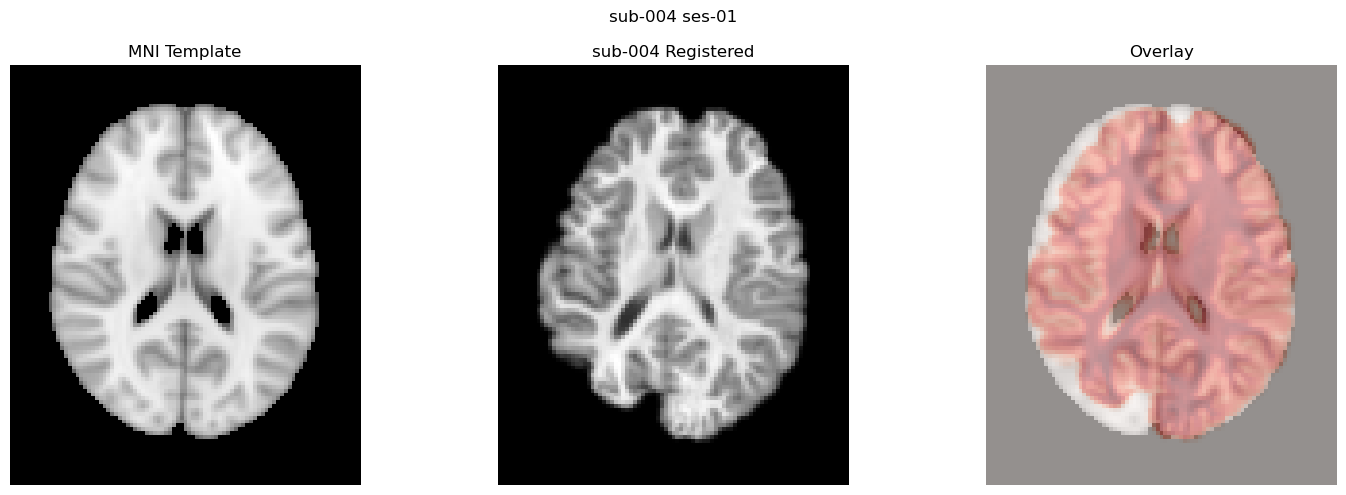


=== sub-004 ses-02 ===
✓ Registered shape: (91, 109, 91), MNI shape: (91, 109, 91)


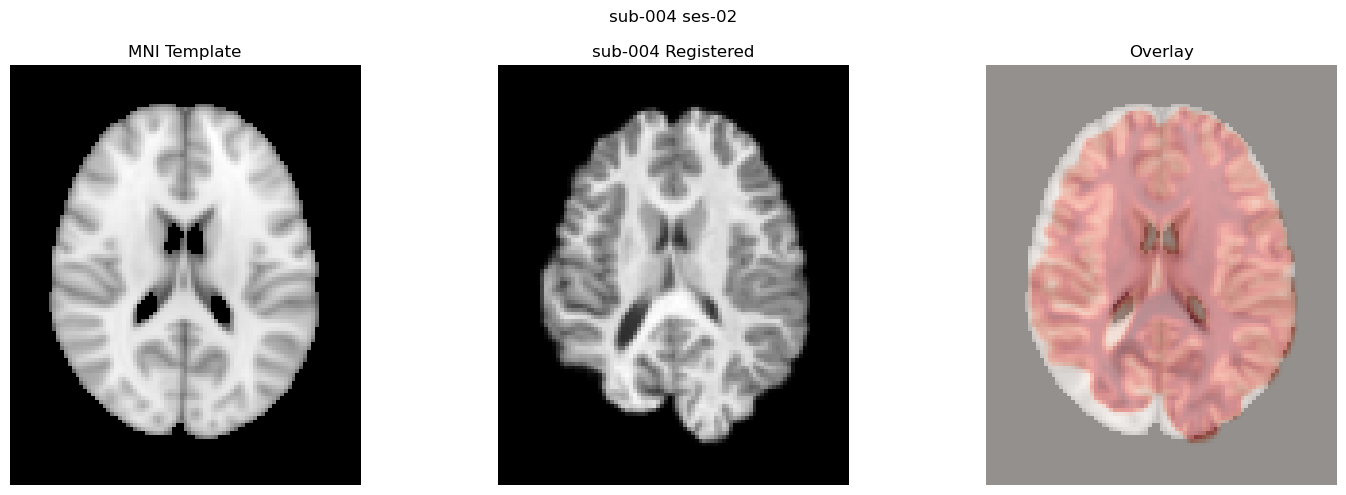


=== sub-004 ses-03 ===
✓ Registered shape: (91, 109, 91), MNI shape: (91, 109, 91)


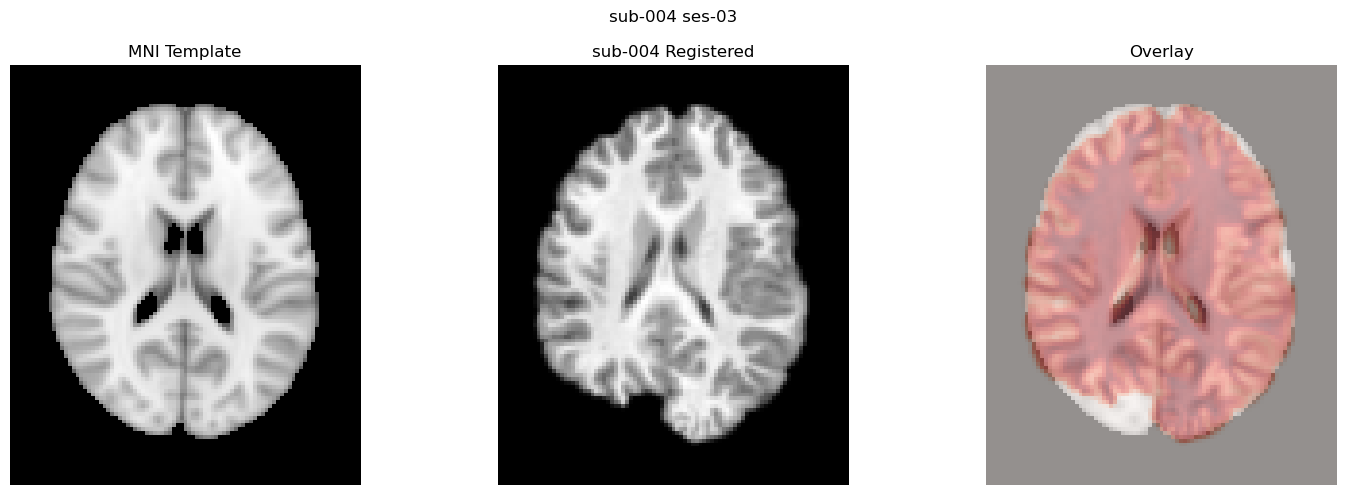


=== sub-004 ses-04 ===
❌ Registered brain not found

=== sub-004 ses-05 ===
✓ Registered shape: (91, 109, 91), MNI shape: (91, 109, 91)


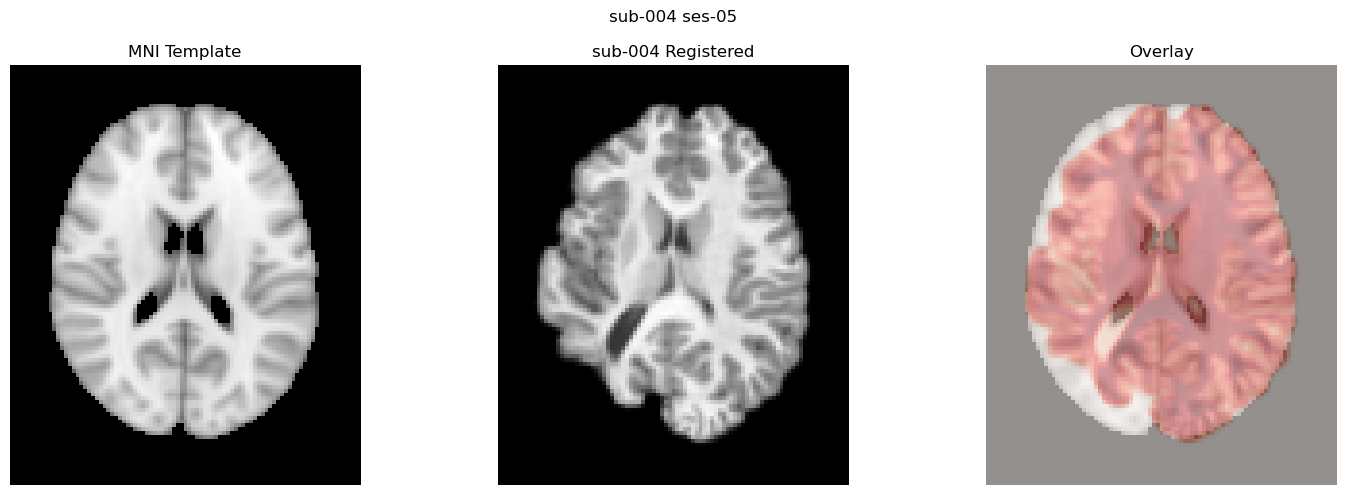


=== sub-007 ses-01 ===
✓ Registered shape: (91, 109, 91), MNI shape: (91, 109, 91)


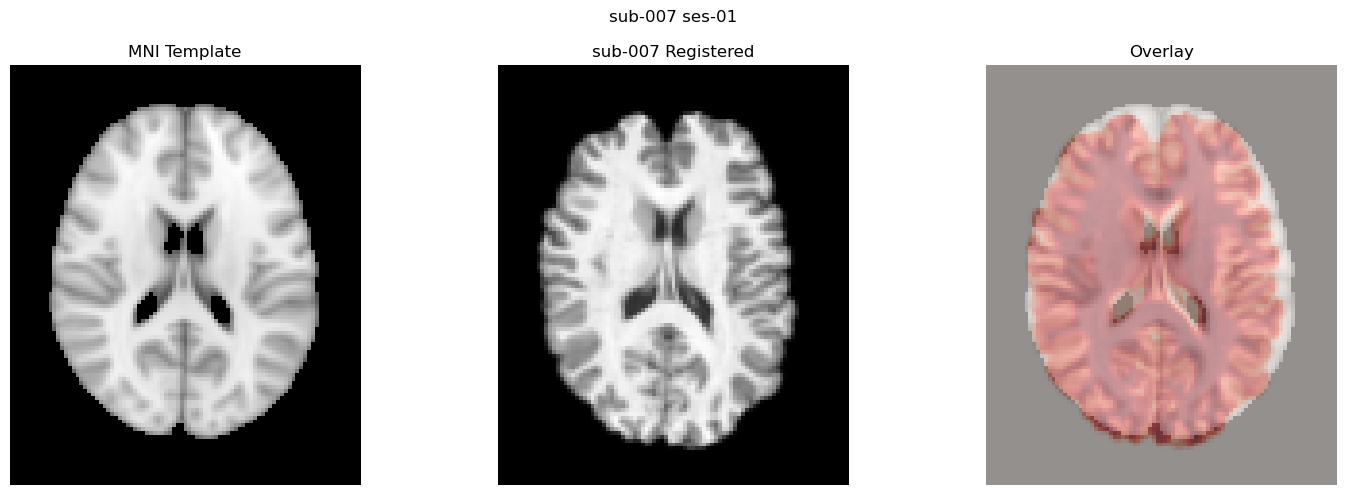


=== sub-007 ses-02 ===
❌ Registered brain not found

=== sub-007 ses-03 ===
✓ Registered shape: (91, 109, 91), MNI shape: (91, 109, 91)


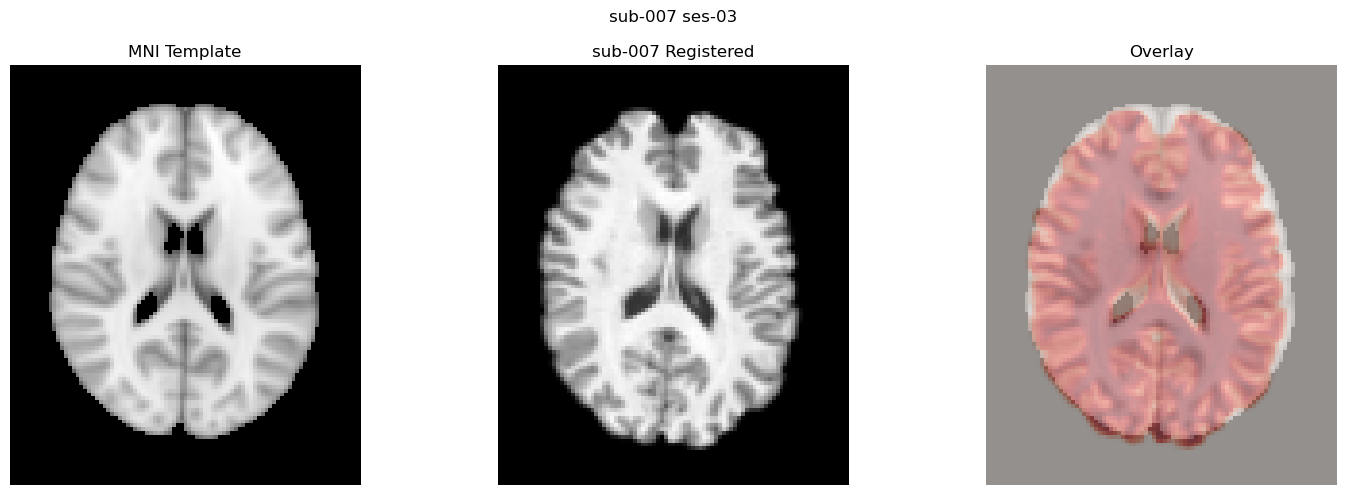


=== sub-008 ses-01 ===
✓ Registered shape: (91, 109, 91), MNI shape: (91, 109, 91)


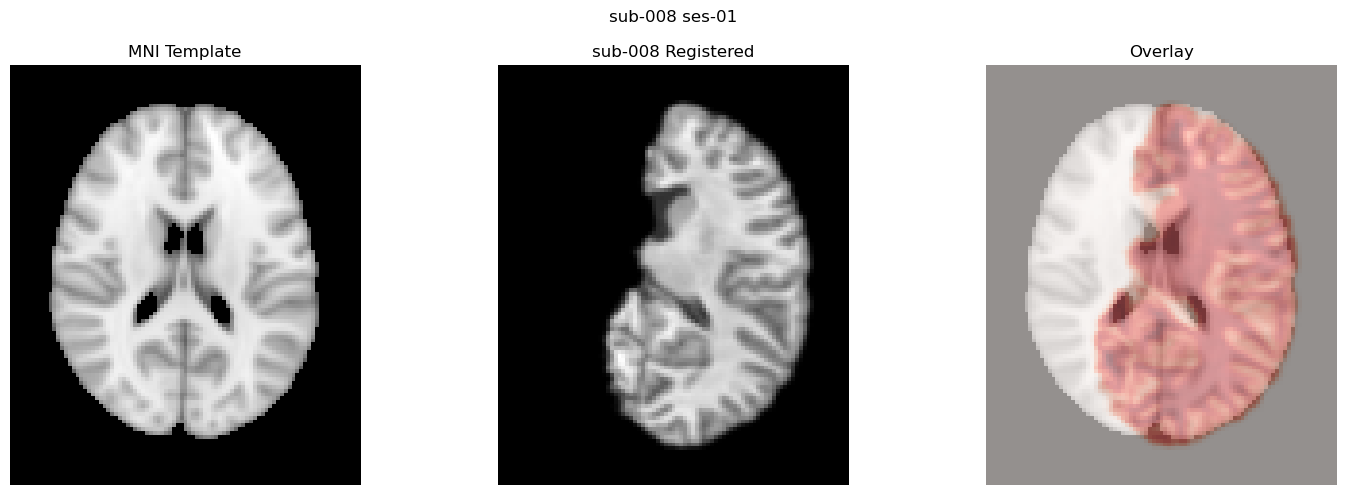


=== sub-008 ses-02 ===
✓ Registered shape: (91, 109, 91), MNI shape: (91, 109, 91)


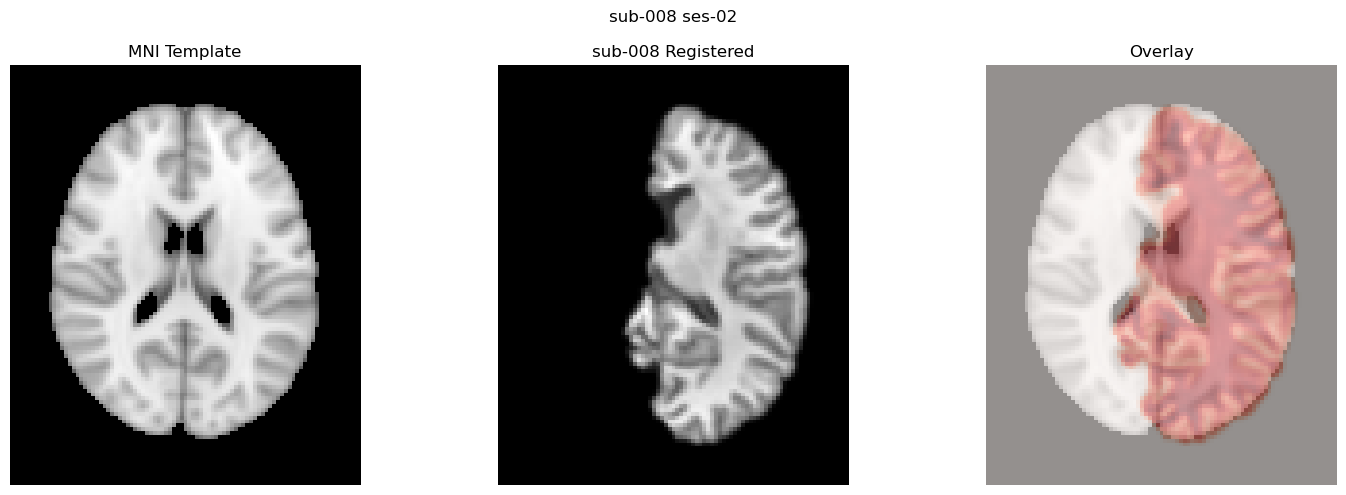


=== sub-010 ses-02 ===
✓ Registered shape: (91, 109, 91), MNI shape: (91, 109, 91)


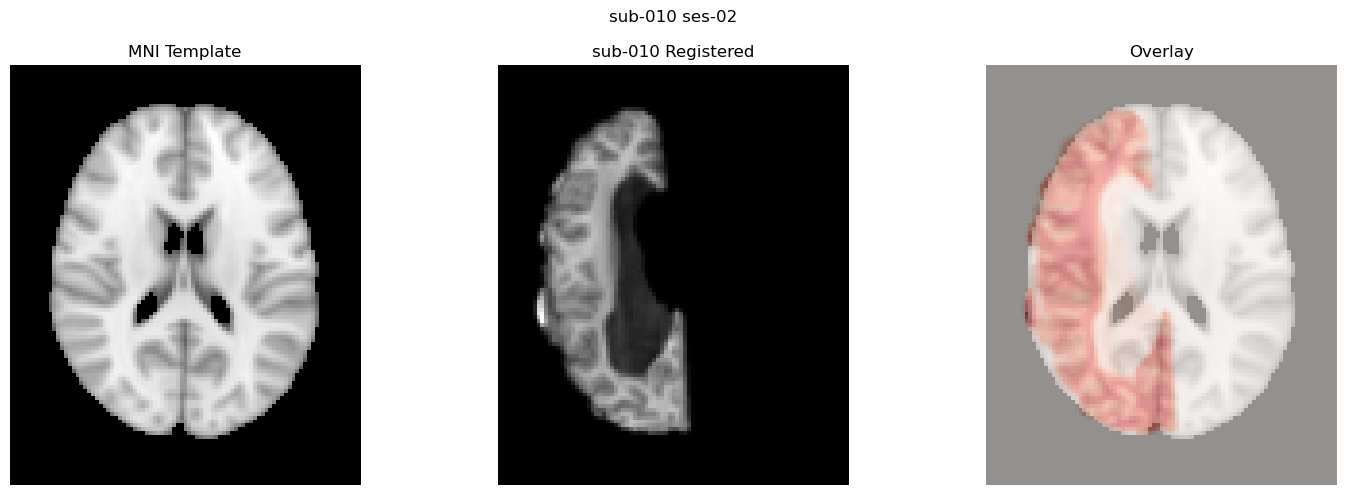


=== sub-010 ses-03 ===
✓ Registered shape: (91, 109, 91), MNI shape: (91, 109, 91)


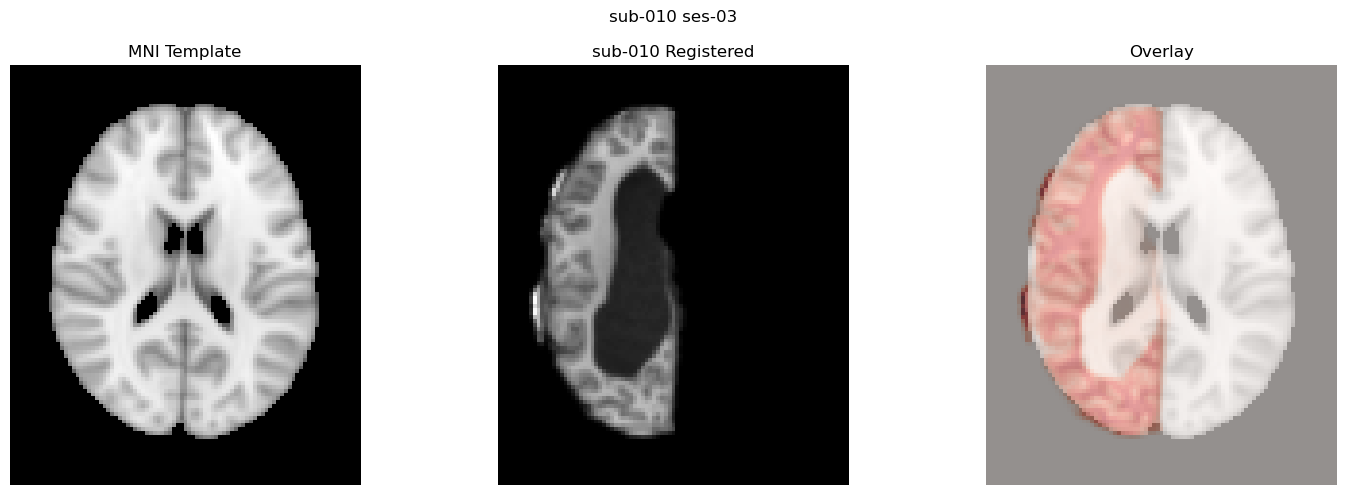


=== sub-017 ses-01 ===
✓ Registered shape: (91, 109, 91), MNI shape: (91, 109, 91)


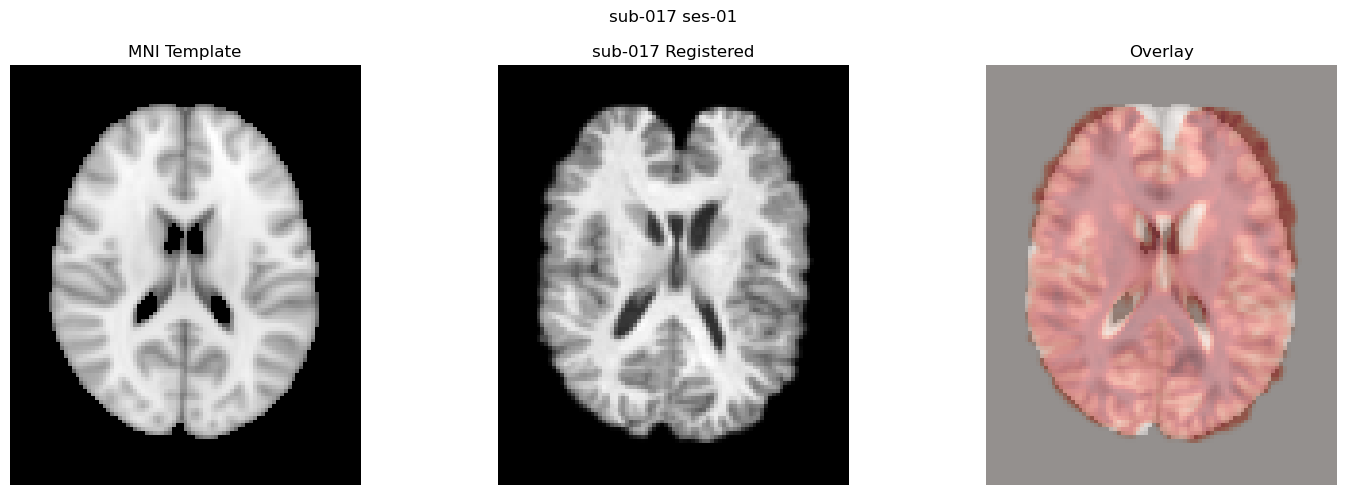


=== sub-017 ses-02 ===
✓ Registered shape: (91, 109, 91), MNI shape: (91, 109, 91)


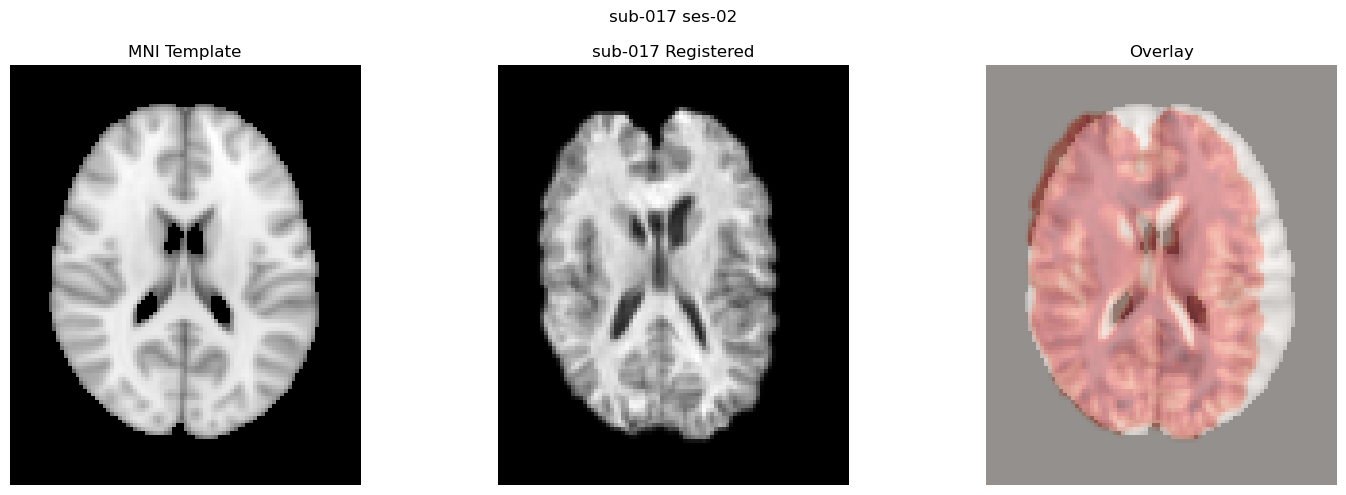


=== sub-018 ses-02 ===
✓ Registered shape: (91, 109, 91), MNI shape: (91, 109, 91)


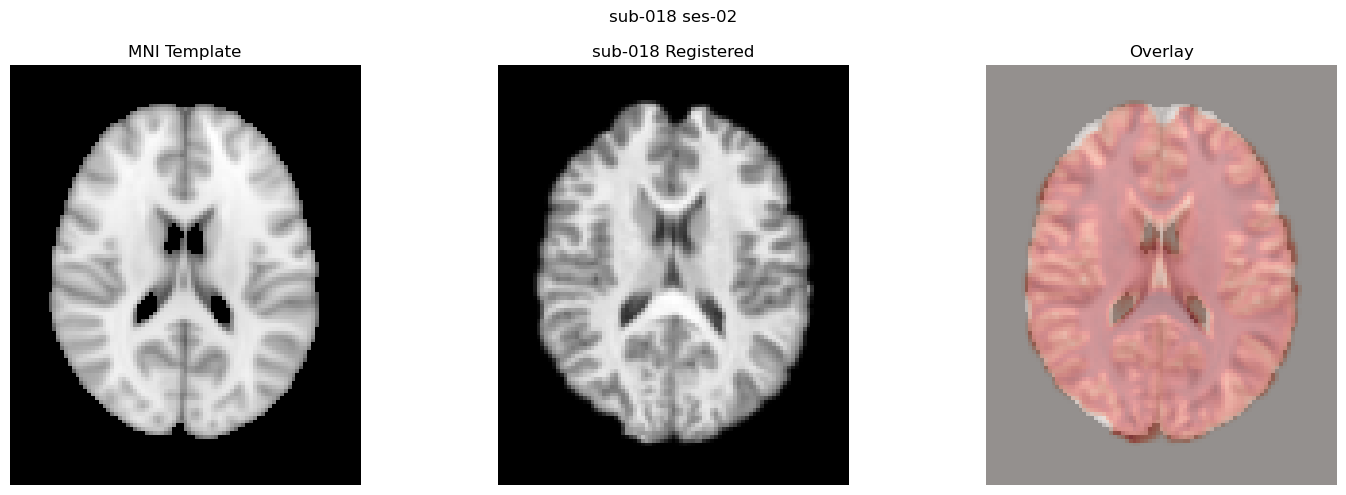


=== sub-018 ses-03 ===
✓ Registered shape: (91, 109, 91), MNI shape: (91, 109, 91)


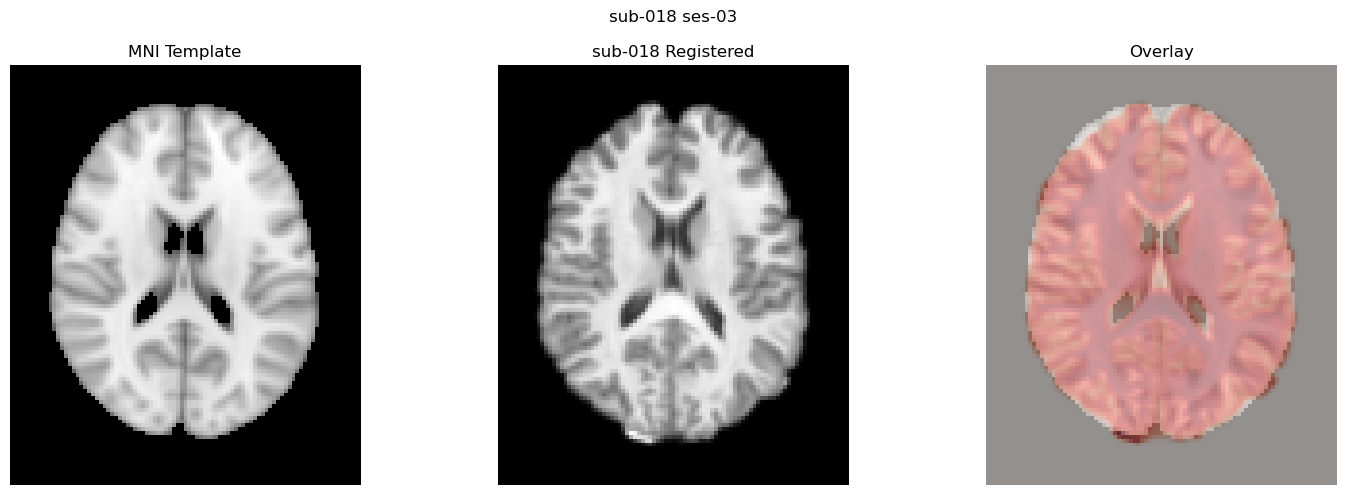


=== sub-021 ses-01 ===
✓ Registered shape: (91, 109, 91), MNI shape: (91, 109, 91)


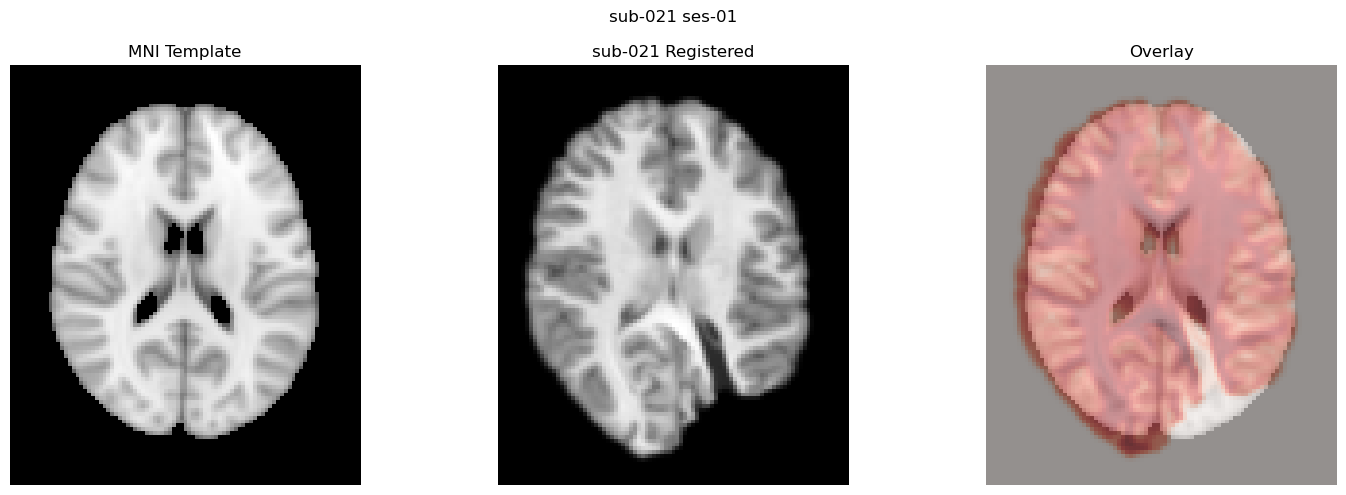


=== sub-021 ses-02 ===
✓ Registered shape: (91, 109, 91), MNI shape: (91, 109, 91)


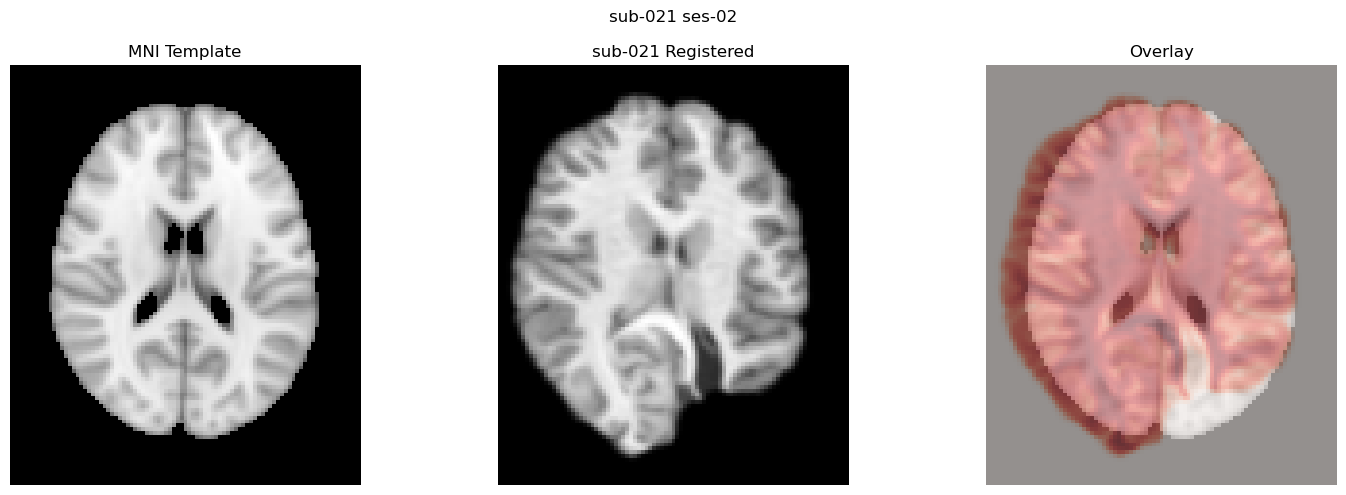


=== sub-045 ses-01 ===
✓ Registered shape: (91, 109, 91), MNI shape: (91, 109, 91)


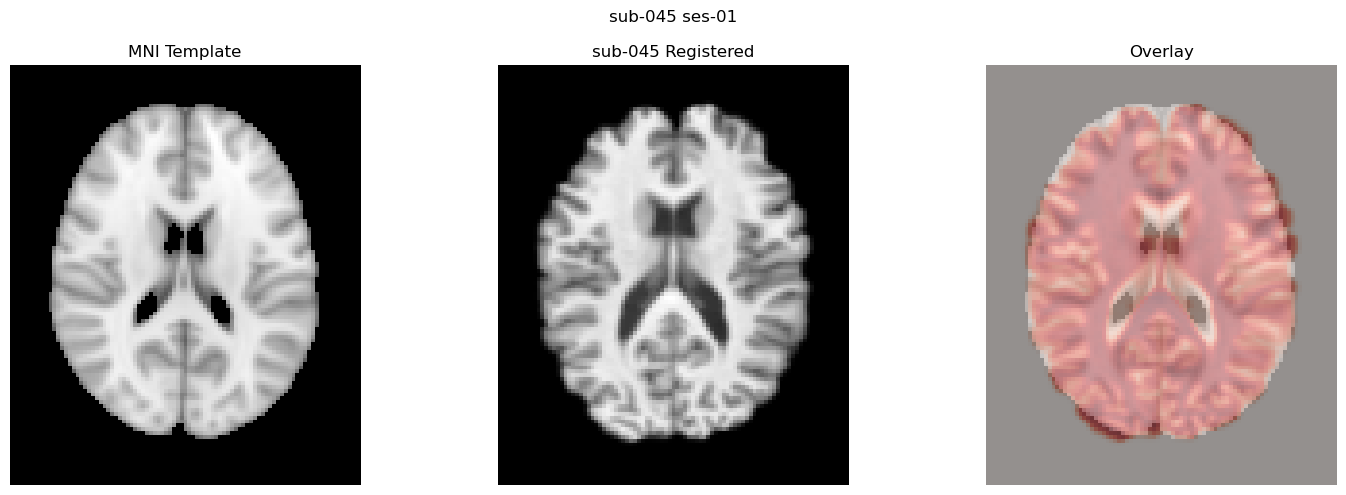


=== sub-045 ses-02 ===
✓ Registered shape: (91, 109, 91), MNI shape: (91, 109, 91)


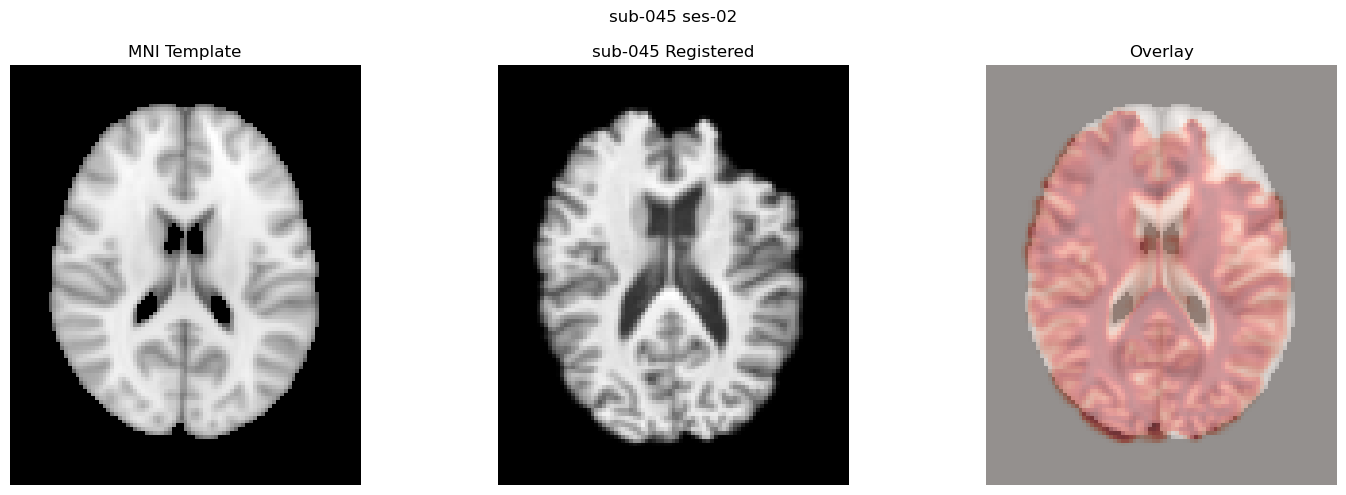


=== sub-045 ses-03 ===
✓ Registered shape: (91, 109, 91), MNI shape: (91, 109, 91)


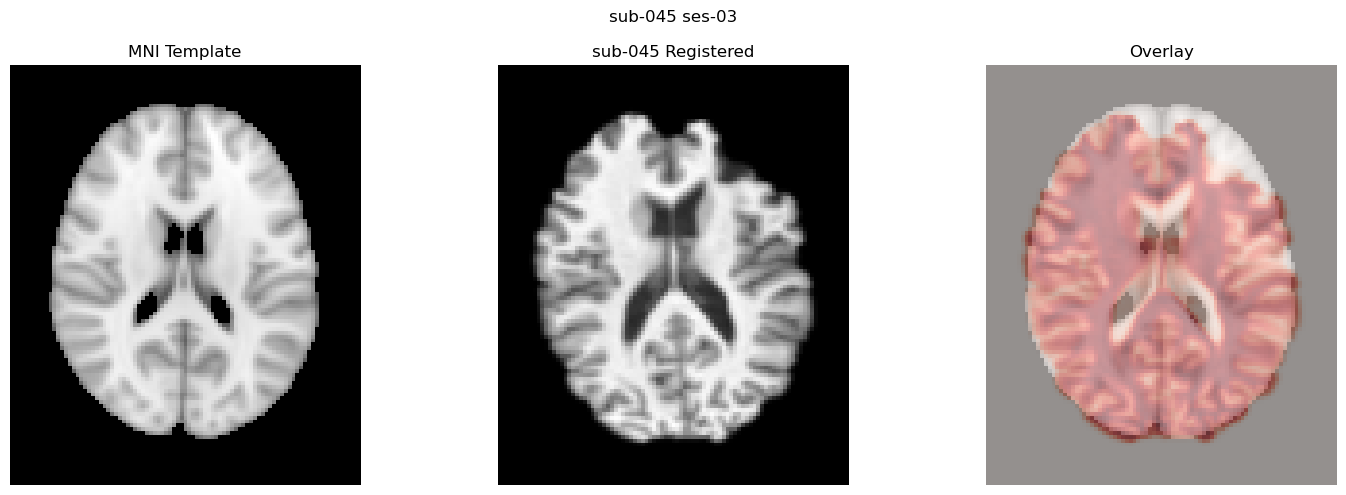


=== sub-047 ses-01 ===
✓ Registered shape: (91, 109, 91), MNI shape: (91, 109, 91)


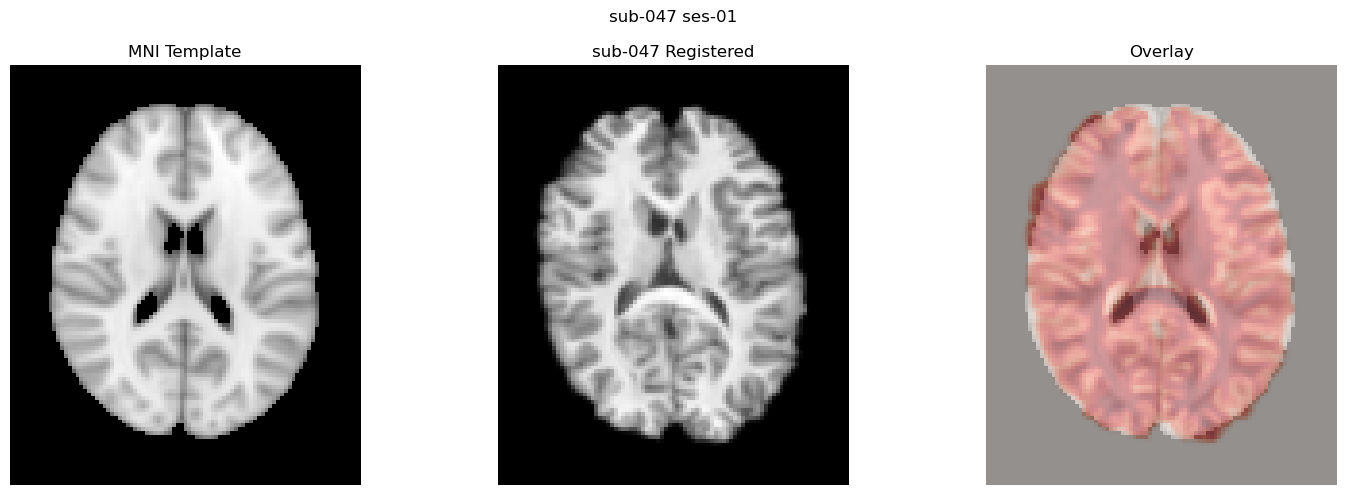


=== sub-047 ses-02 ===
✓ Registered shape: (91, 109, 91), MNI shape: (91, 109, 91)


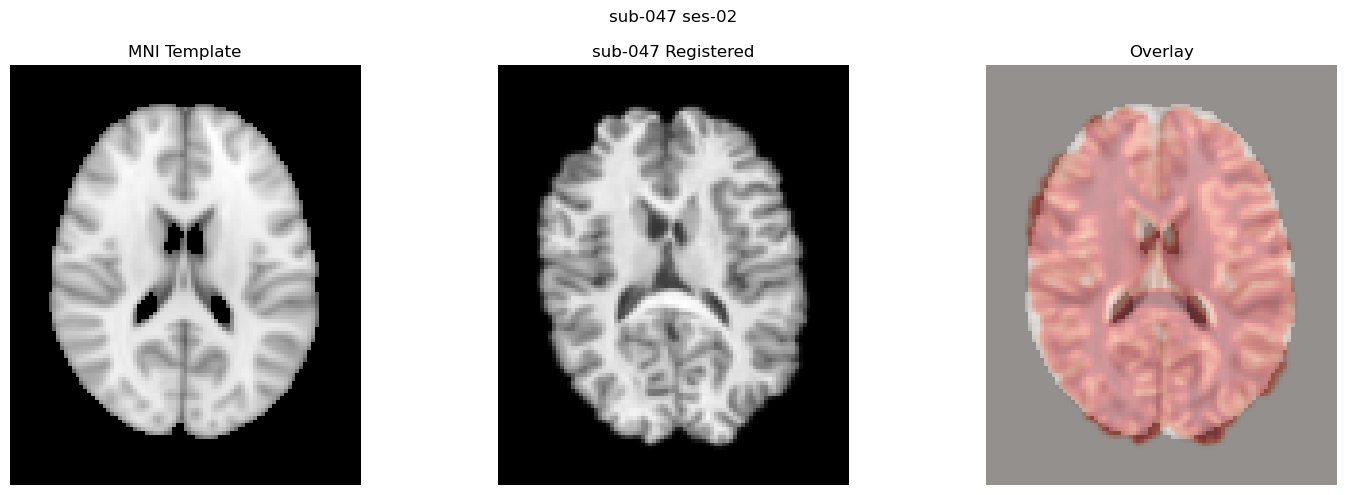


=== sub-049 ses-01 ===
✓ Registered shape: (91, 109, 91), MNI shape: (91, 109, 91)


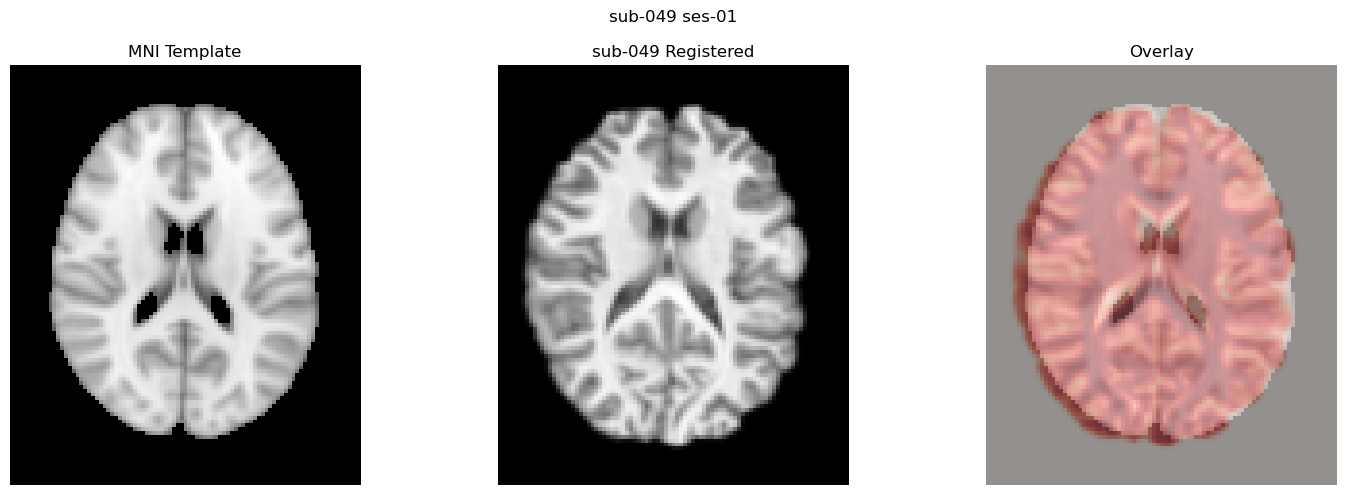


=== sub-049 ses-02 ===
✓ Registered shape: (91, 109, 91), MNI shape: (91, 109, 91)


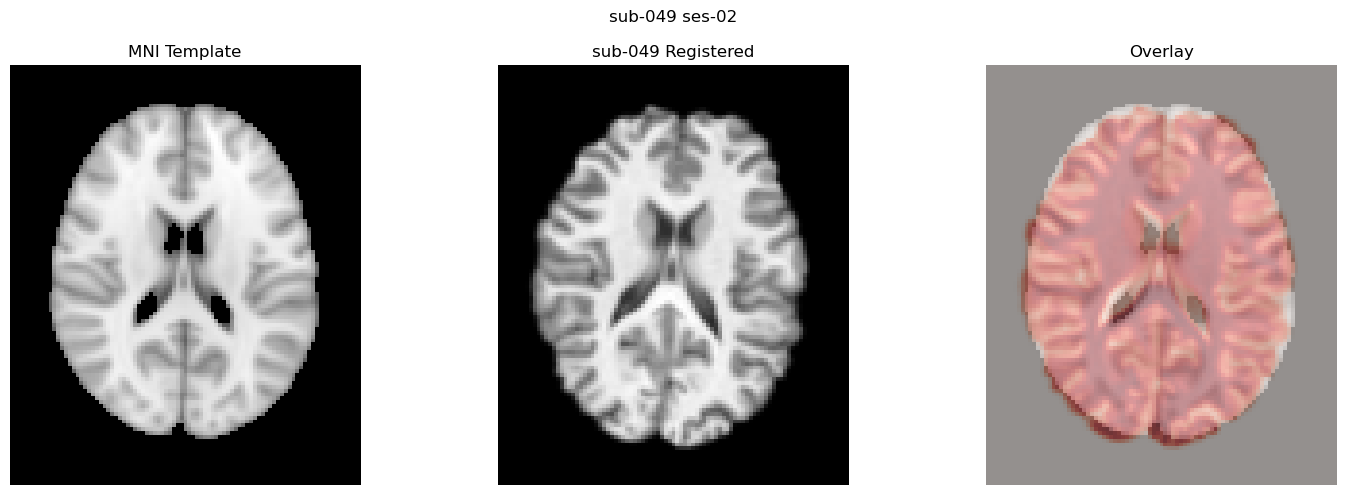


=== sub-070 ses-01 ===
✓ Registered shape: (91, 109, 91), MNI shape: (91, 109, 91)


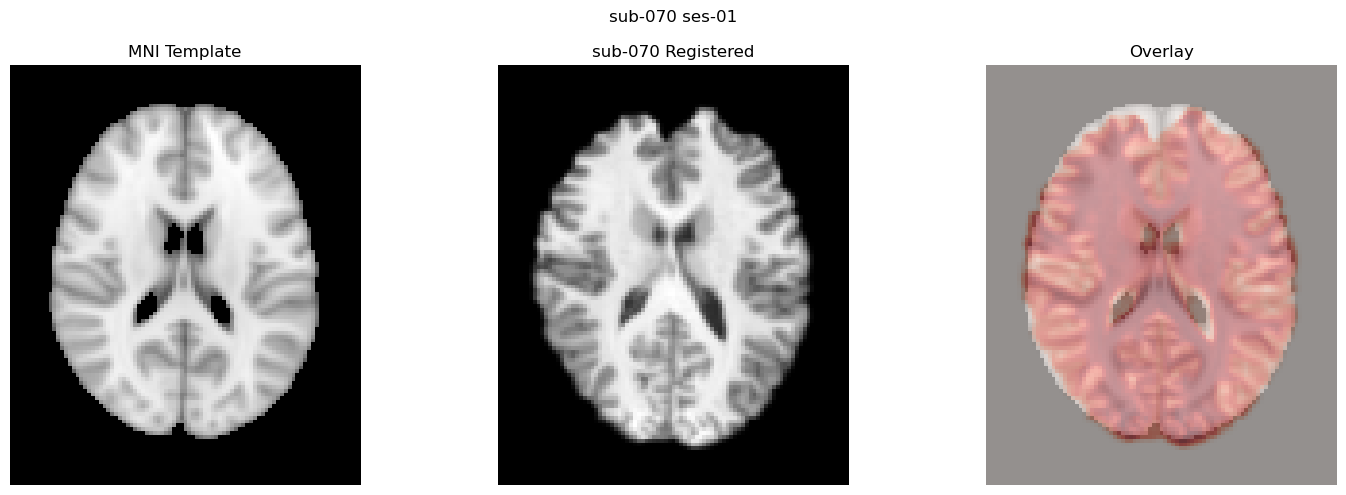


=== sub-070 ses-02 ===
✓ Registered shape: (91, 109, 91), MNI shape: (91, 109, 91)


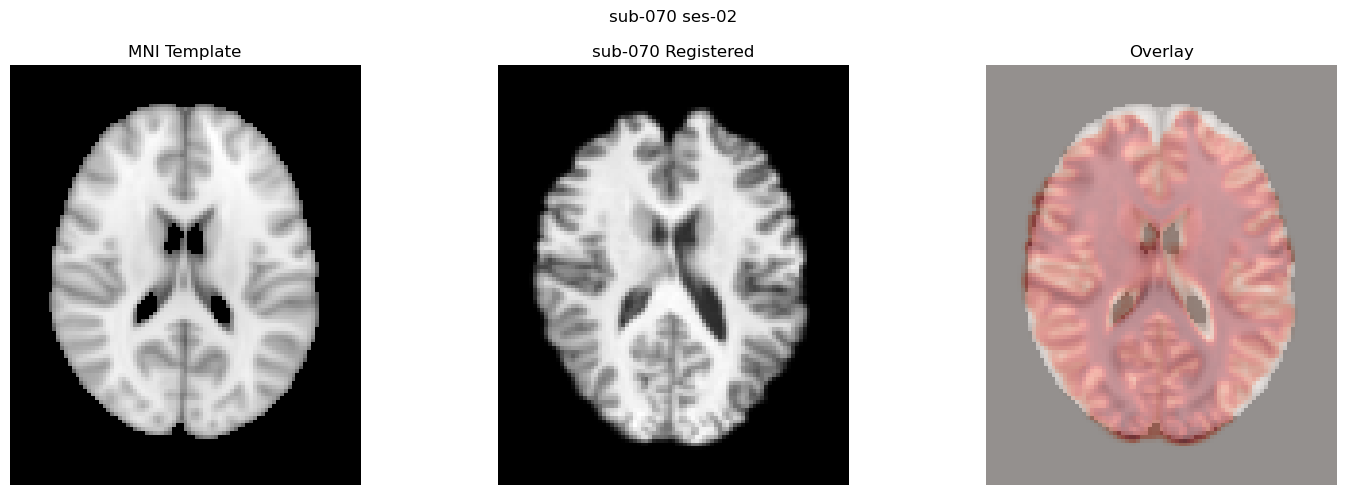


=== sub-072 ses-01 ===
✓ Registered shape: (91, 109, 91), MNI shape: (91, 109, 91)


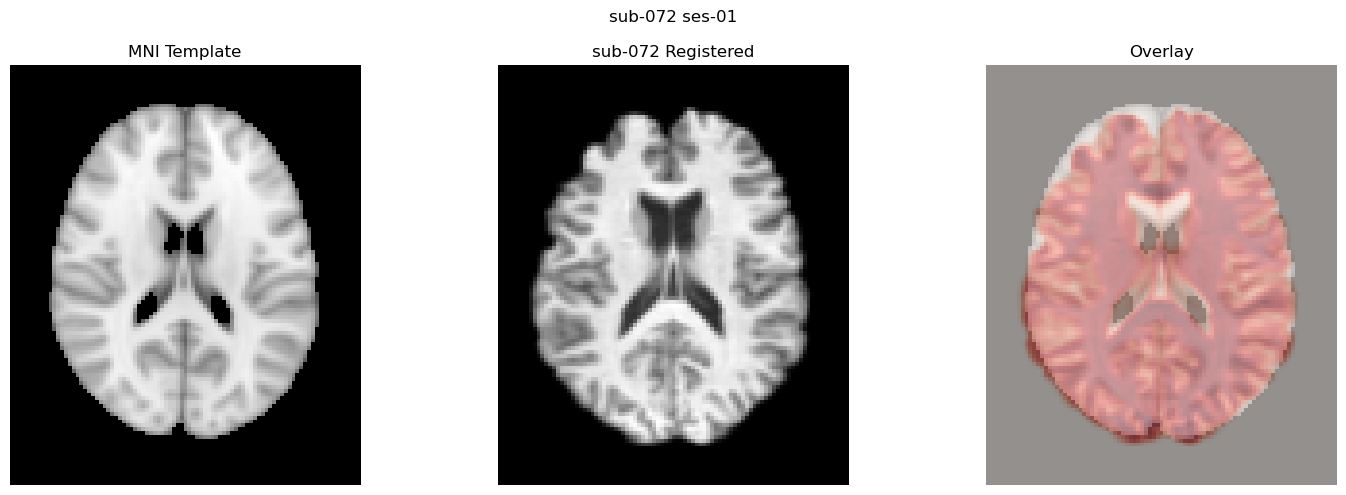


=== sub-072 ses-02 ===
✓ Registered shape: (91, 109, 91), MNI shape: (91, 109, 91)


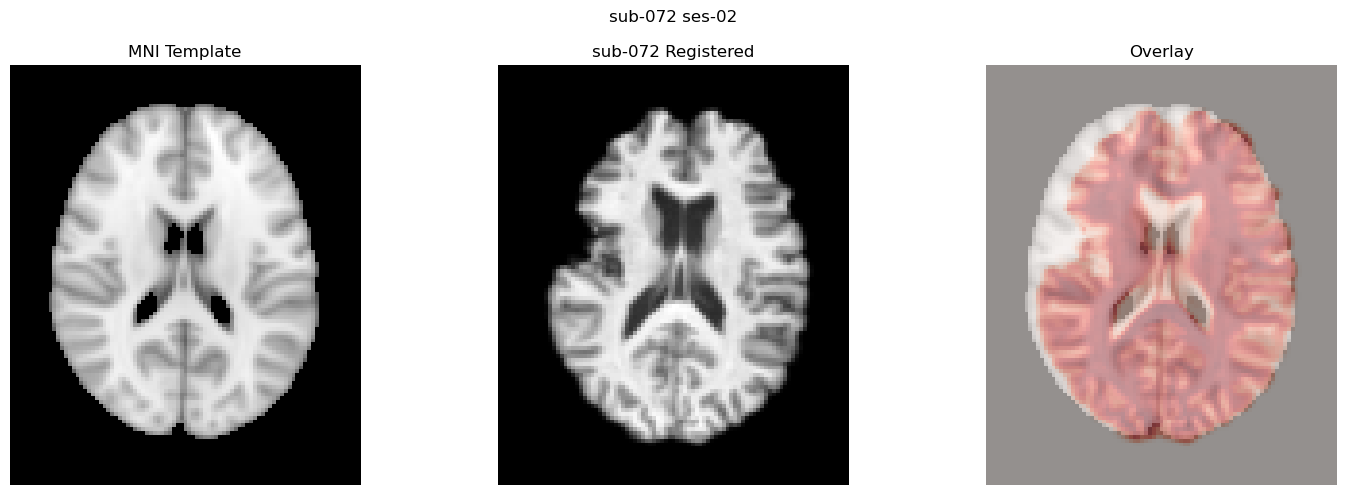


=== sub-073 ses-01 ===
✓ Registered shape: (91, 109, 91), MNI shape: (91, 109, 91)


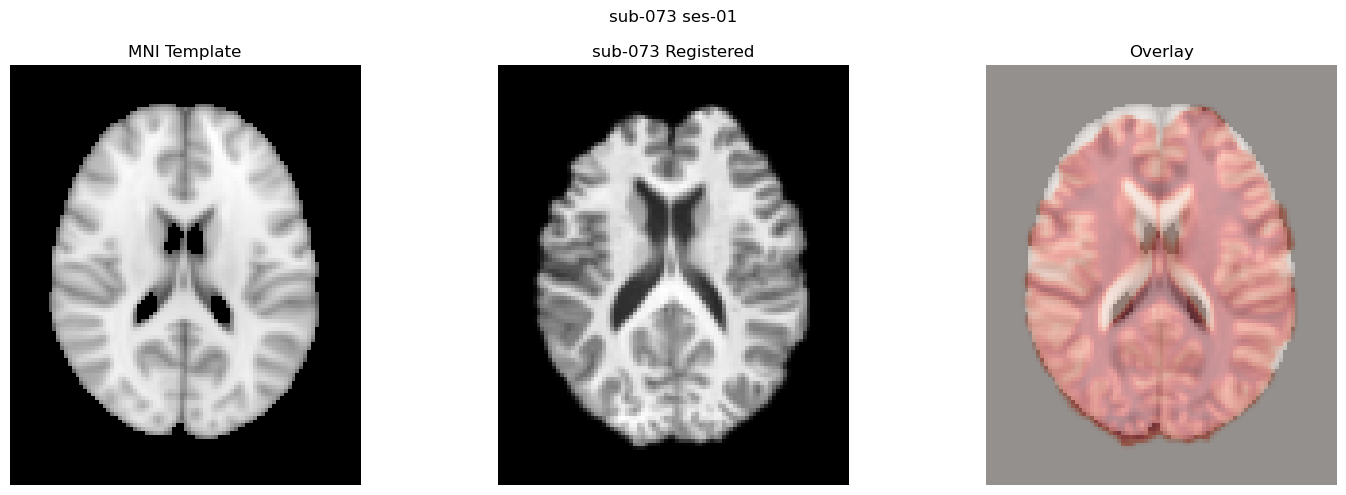


=== sub-073 ses-02 ===
✓ Registered shape: (91, 109, 91), MNI shape: (91, 109, 91)


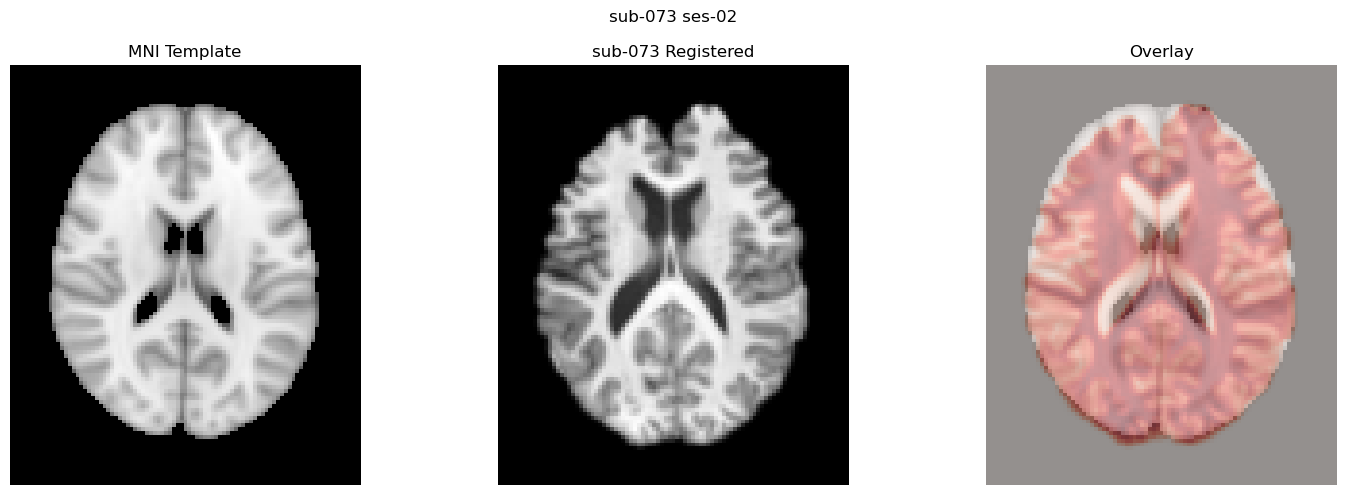


=== sub-079 ses-01 ===
✓ Registered shape: (91, 109, 91), MNI shape: (91, 109, 91)


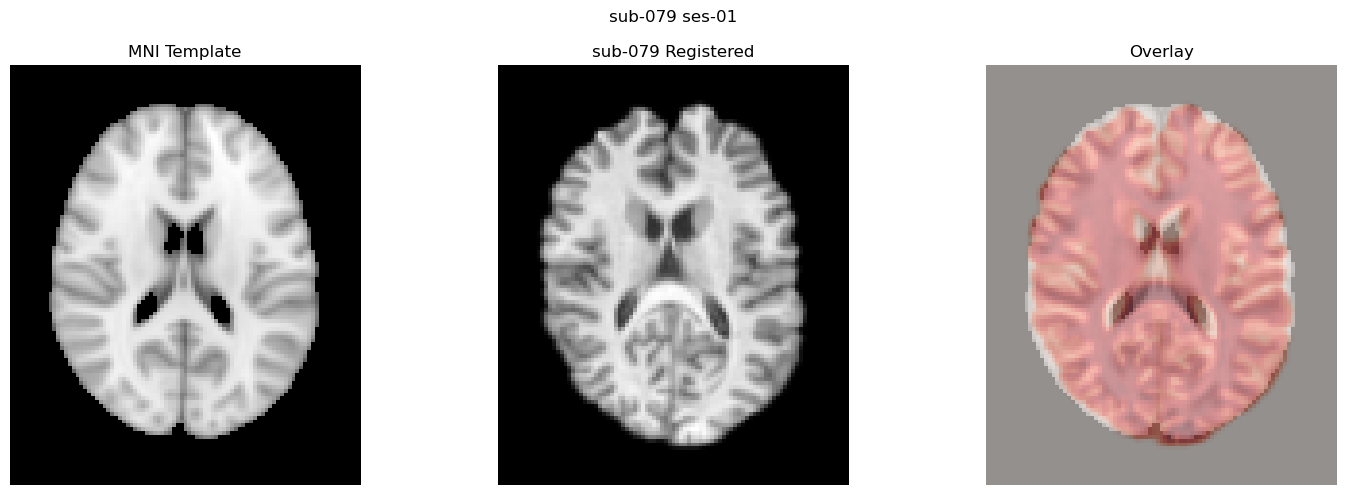


=== sub-079 ses-02 ===
✓ Registered shape: (91, 109, 91), MNI shape: (91, 109, 91)


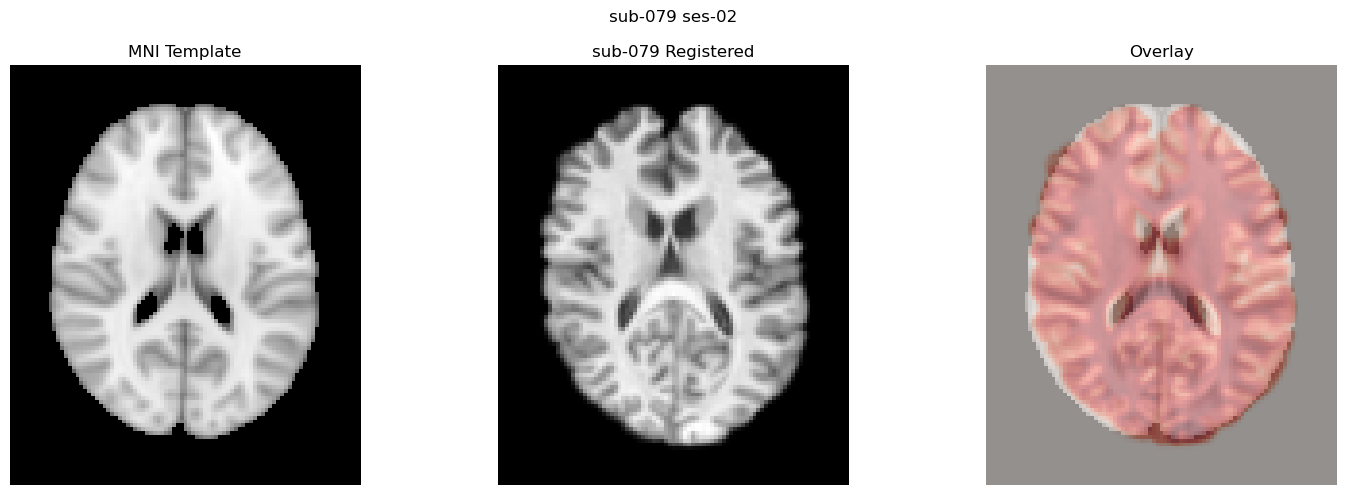


=== sub-081 ses-01 ===
✓ Registered shape: (91, 109, 91), MNI shape: (91, 109, 91)


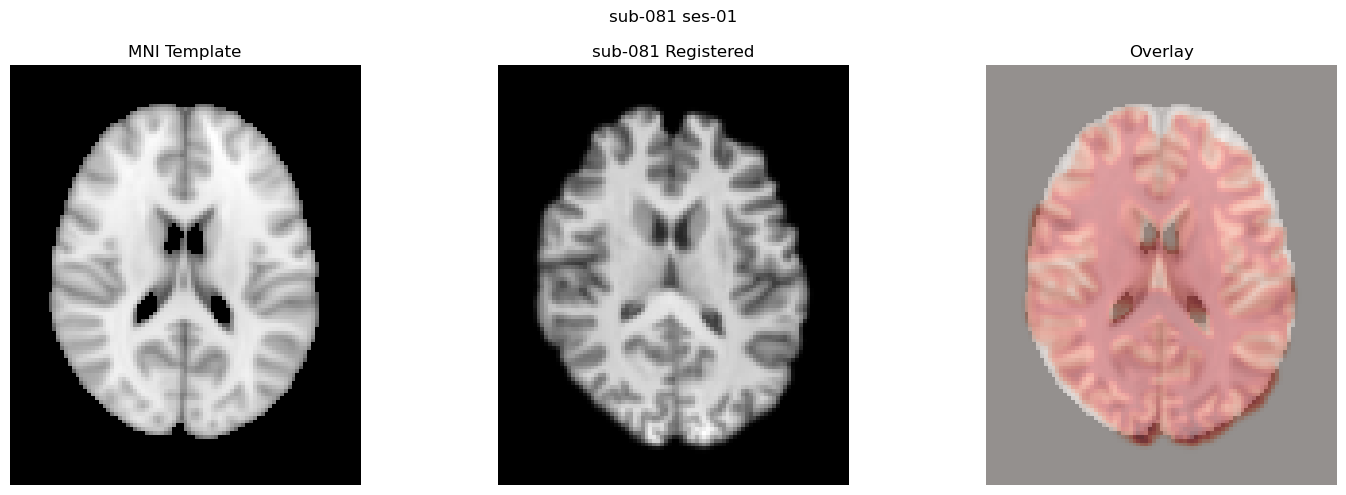


=== sub-081 ses-02 ===
✓ Registered shape: (91, 109, 91), MNI shape: (91, 109, 91)


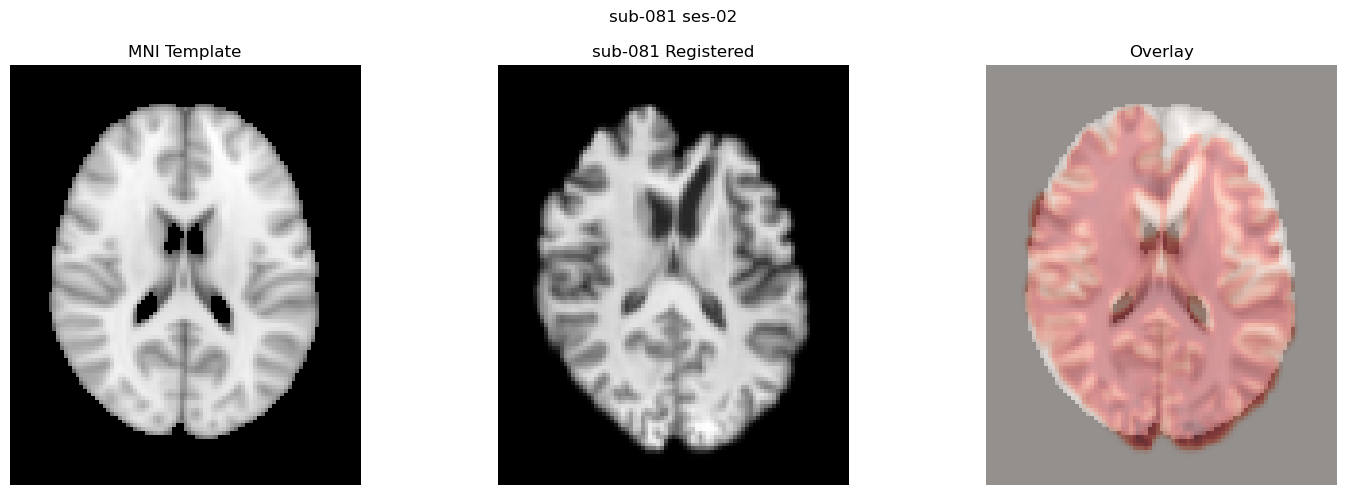


=== sub-086 ses-01 ===
✓ Registered shape: (91, 109, 91), MNI shape: (91, 109, 91)


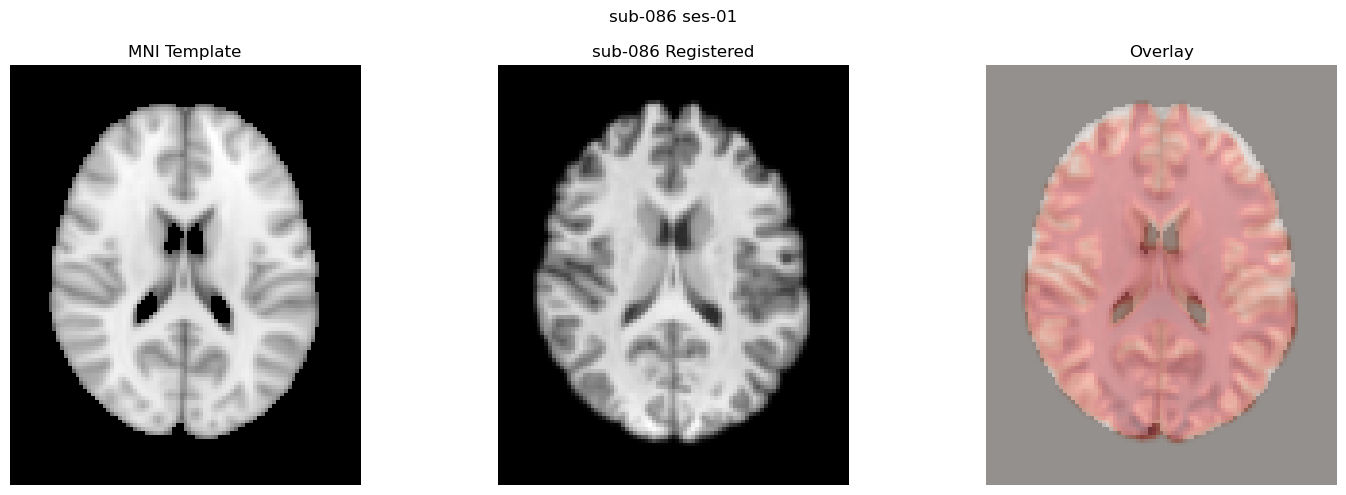


=== sub-086 ses-02 ===
✓ Registered shape: (91, 109, 91), MNI shape: (91, 109, 91)


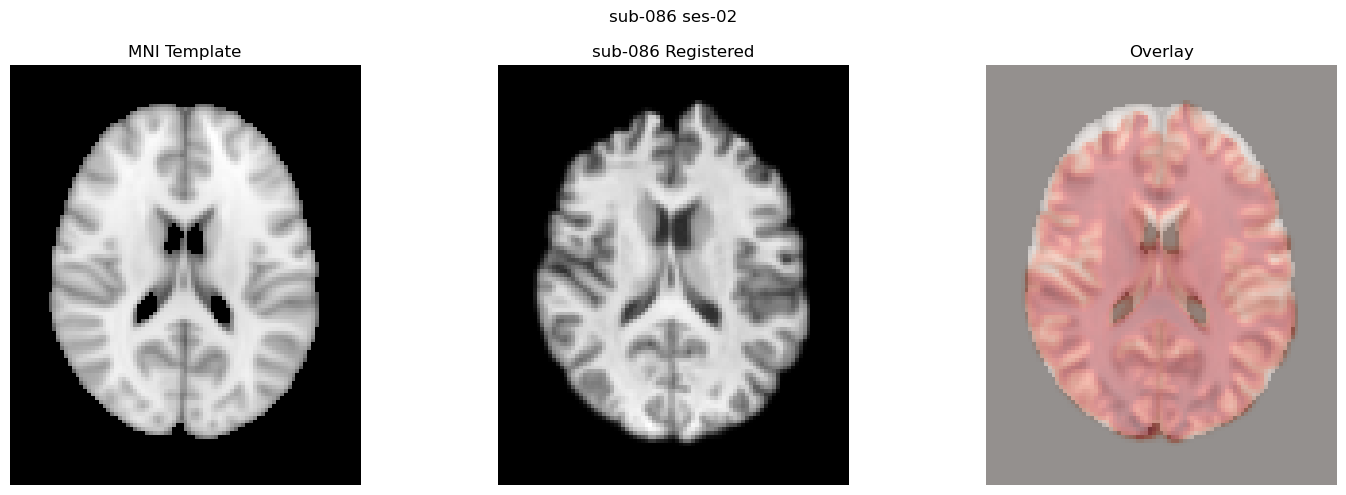


=== sub-108 ses-01 ===
❌ Registered brain not found

=== sub-108 ses-02 ===
❌ Registered brain not found

=== sub-022 ses-01 ===
✓ Registered shape: (91, 109, 91), MNI shape: (91, 109, 91)


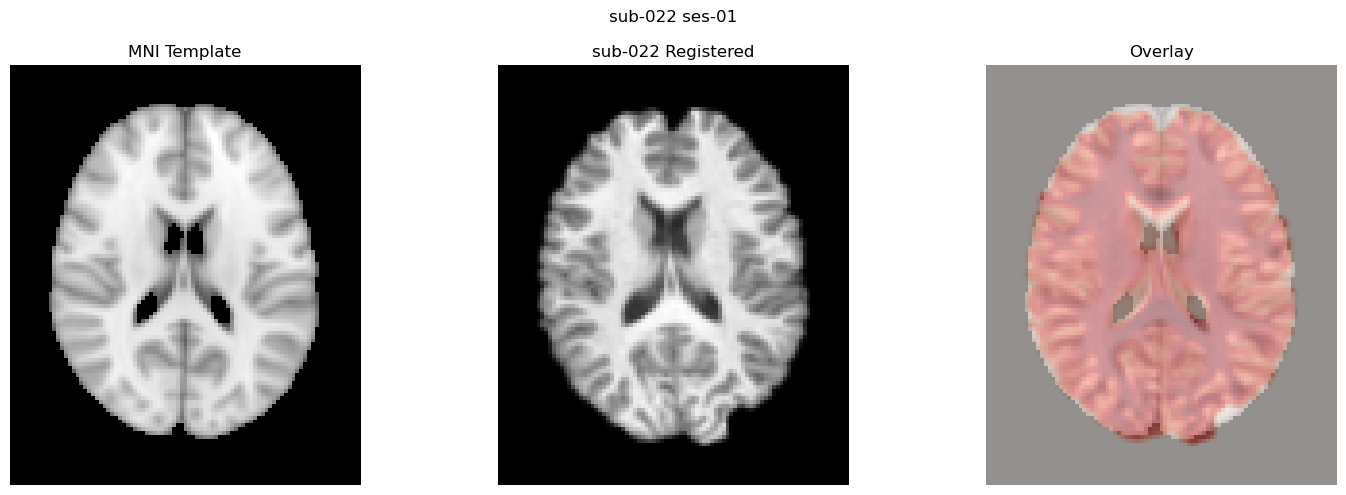


=== sub-022 ses-02 ===
✓ Registered shape: (91, 109, 91), MNI shape: (91, 109, 91)


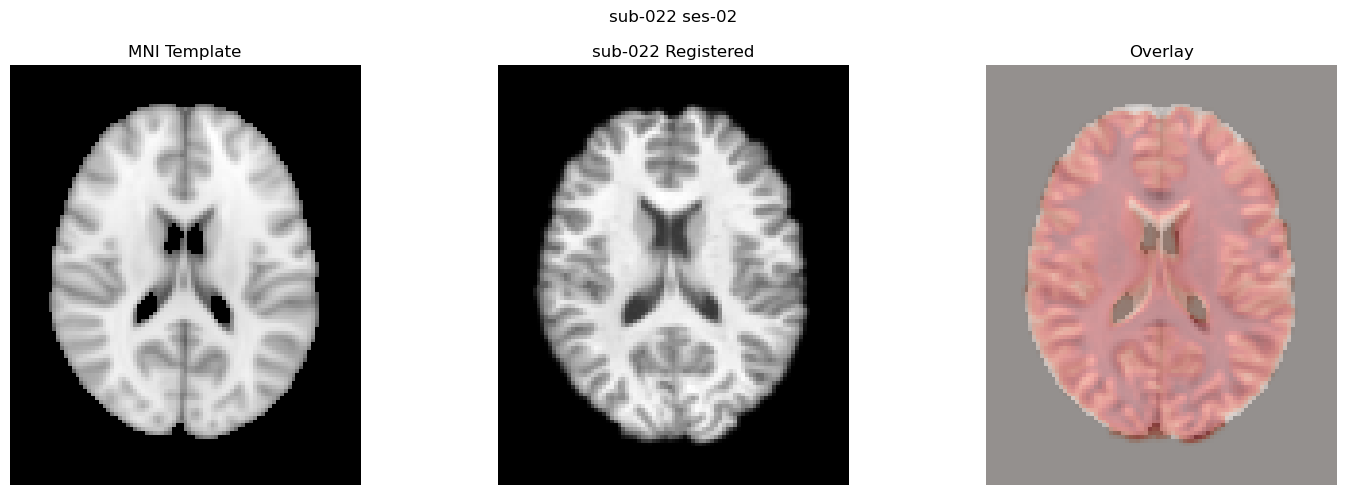


=== sub-025 ses-01 ===
✓ Registered shape: (91, 109, 91), MNI shape: (91, 109, 91)


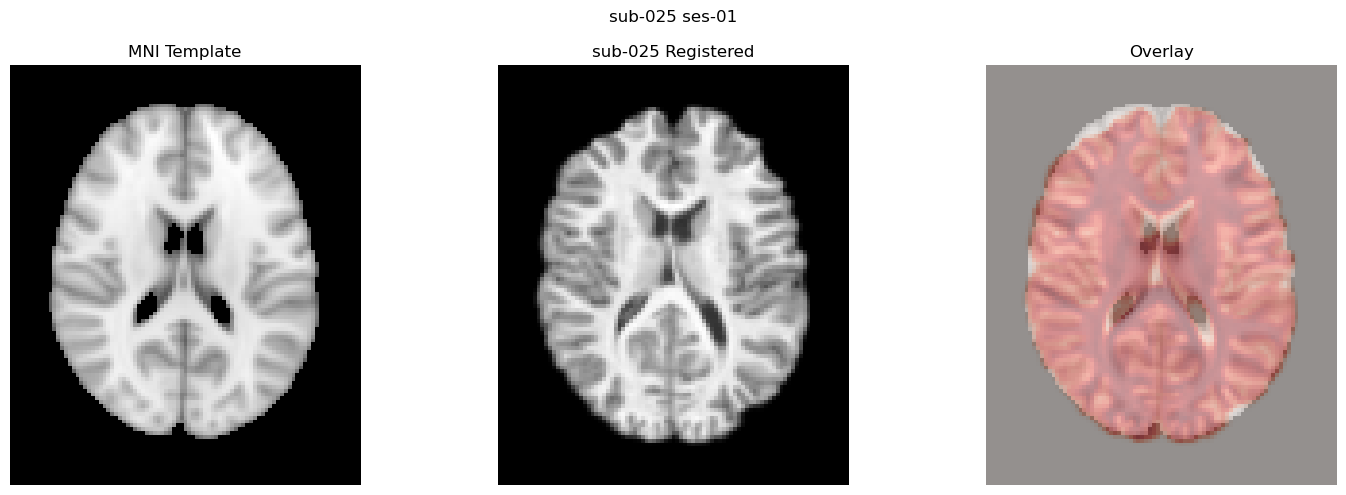


=== sub-025 ses-02 ===
✓ Registered shape: (91, 109, 91), MNI shape: (91, 109, 91)


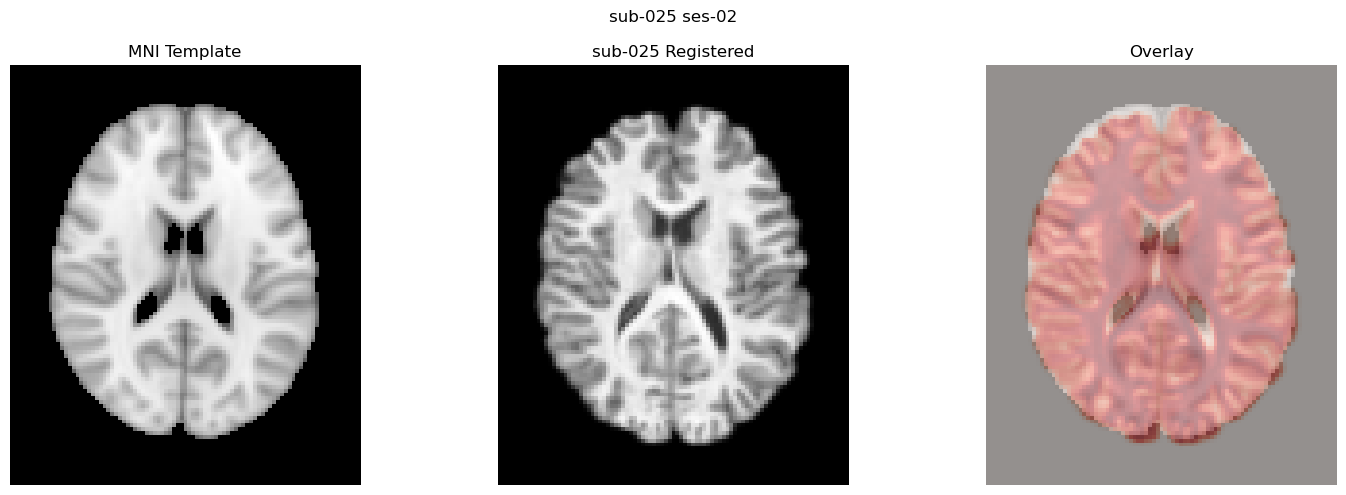


=== sub-027 ses-01 ===
✓ Registered shape: (91, 109, 91), MNI shape: (91, 109, 91)


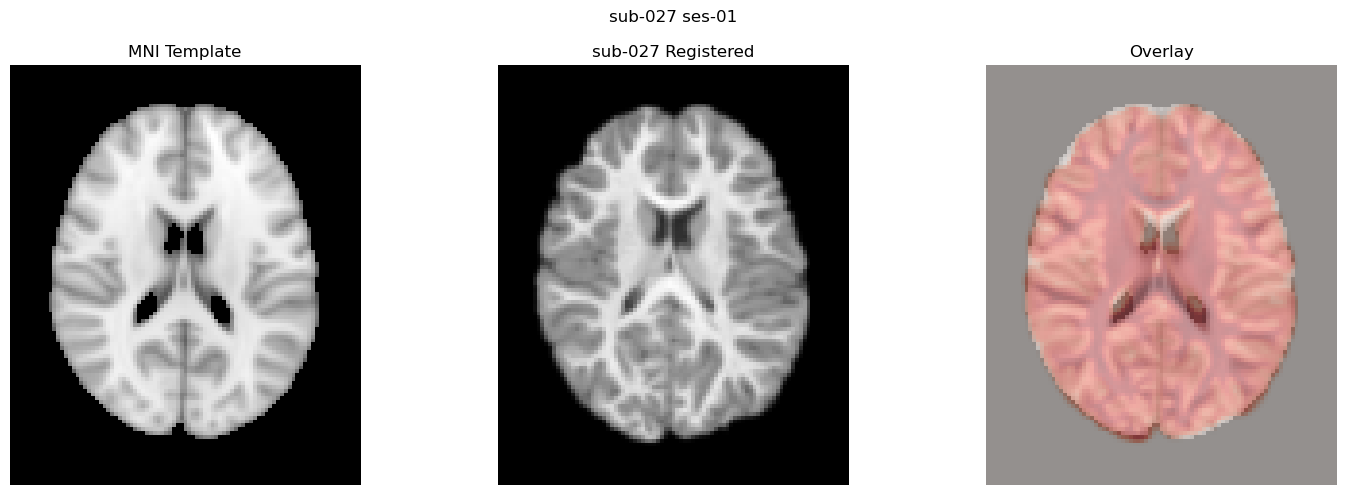


=== sub-027 ses-02 ===
✓ Registered shape: (91, 109, 91), MNI shape: (91, 109, 91)


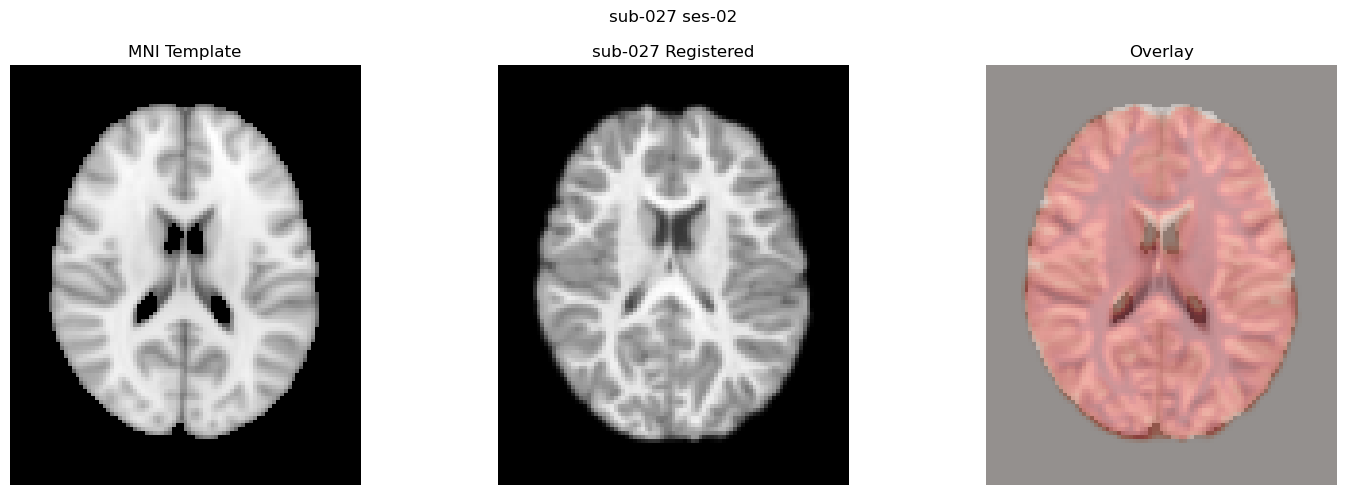


=== sub-052 ses-01 ===
✓ Registered shape: (91, 109, 91), MNI shape: (91, 109, 91)


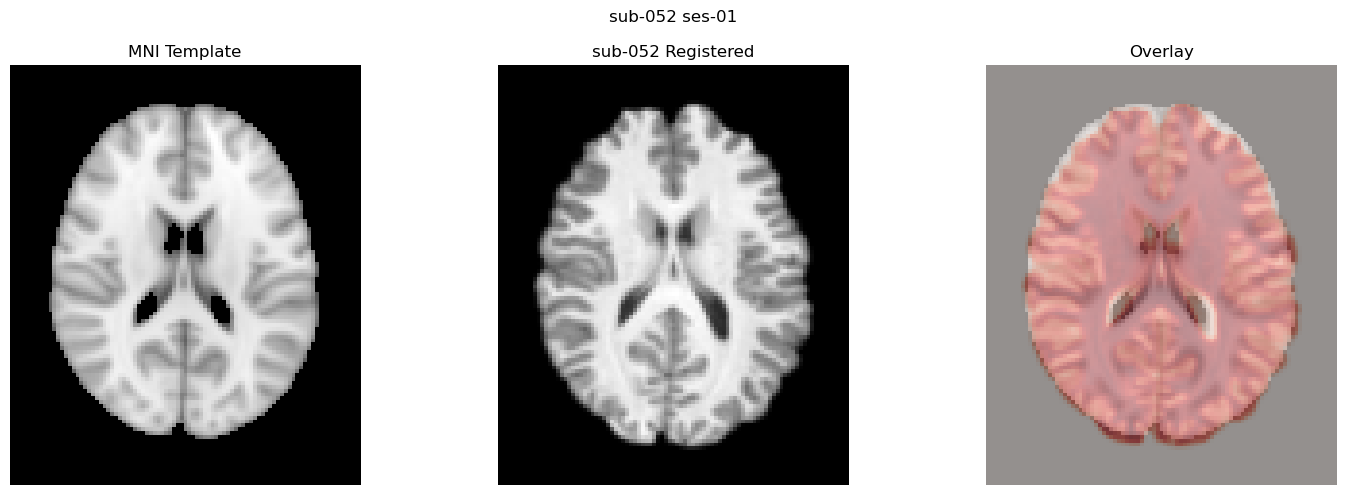


=== sub-052 ses-02 ===
✓ Registered shape: (91, 109, 91), MNI shape: (91, 109, 91)


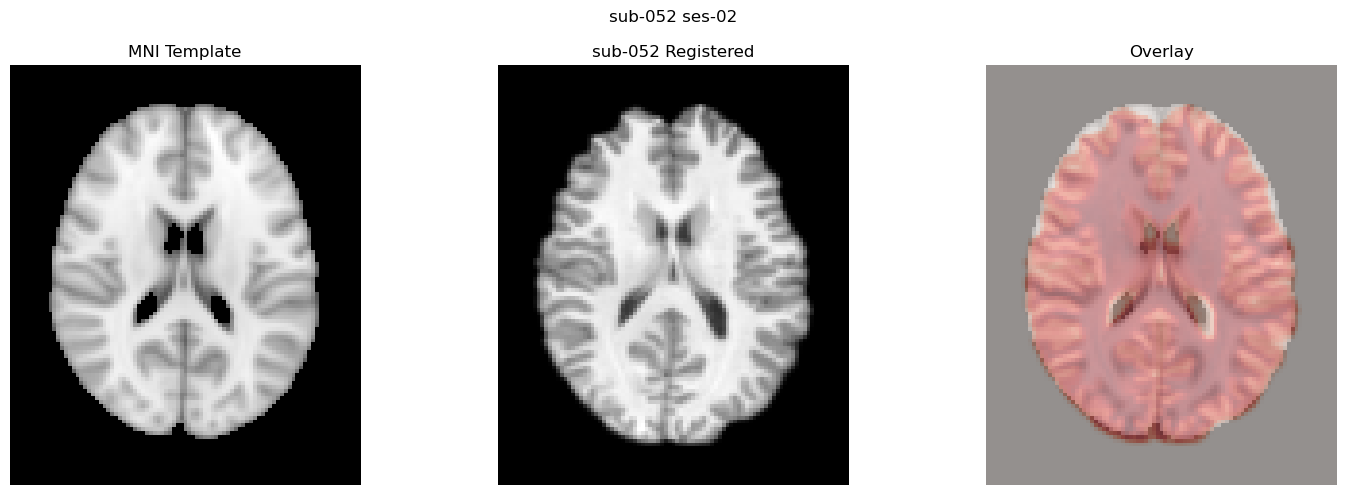


=== sub-058 ses-01 ===
✓ Registered shape: (91, 109, 91), MNI shape: (91, 109, 91)


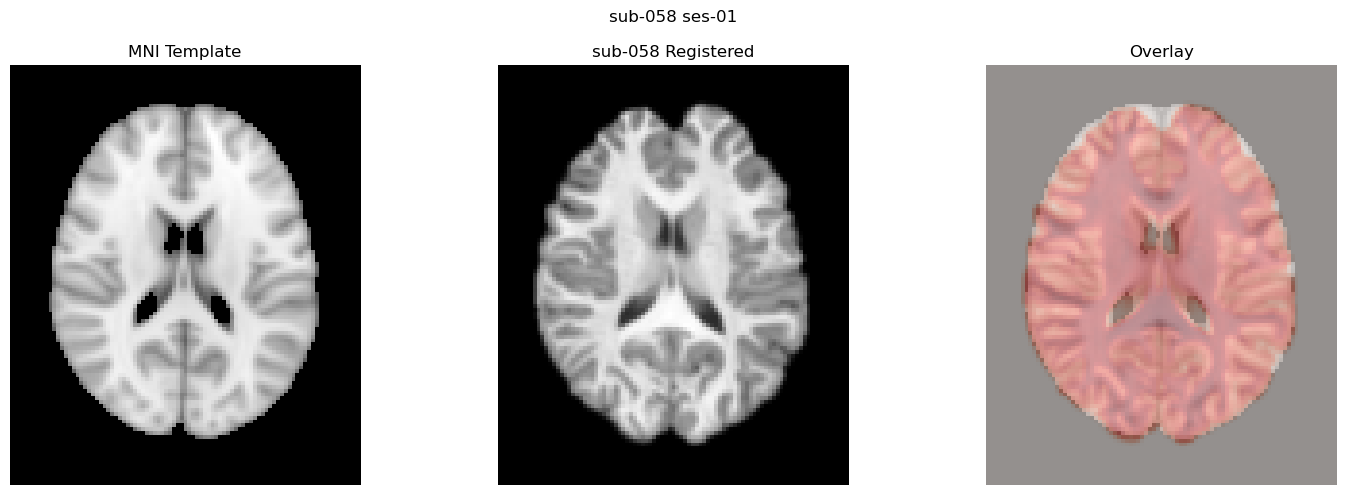


=== sub-058 ses-02 ===
✓ Registered shape: (91, 109, 91), MNI shape: (91, 109, 91)


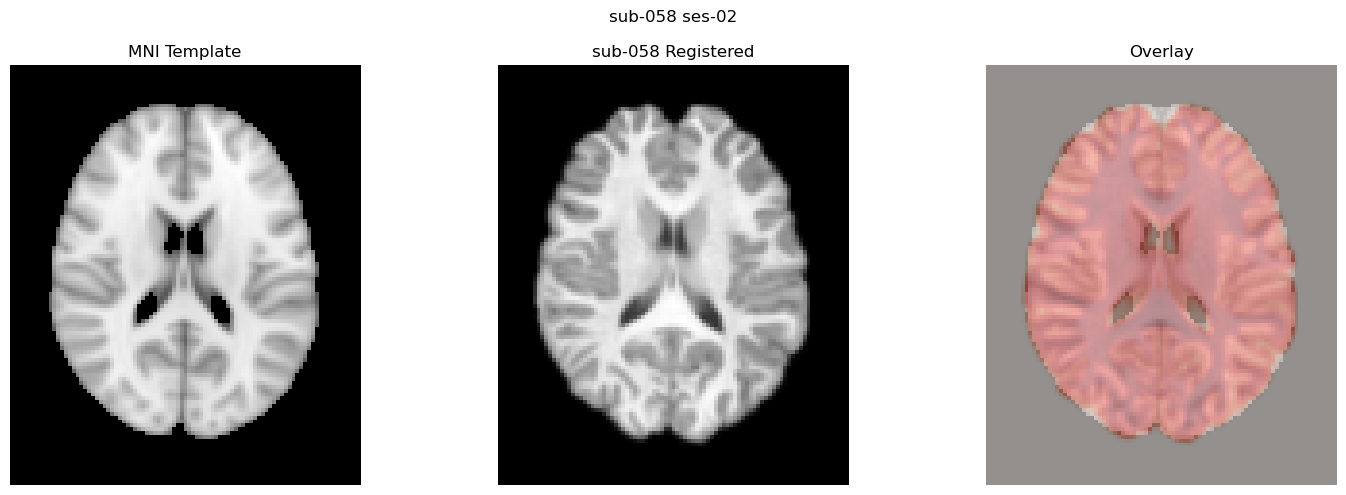


=== sub-062 ses-01 ===
✓ Registered shape: (91, 109, 91), MNI shape: (91, 109, 91)


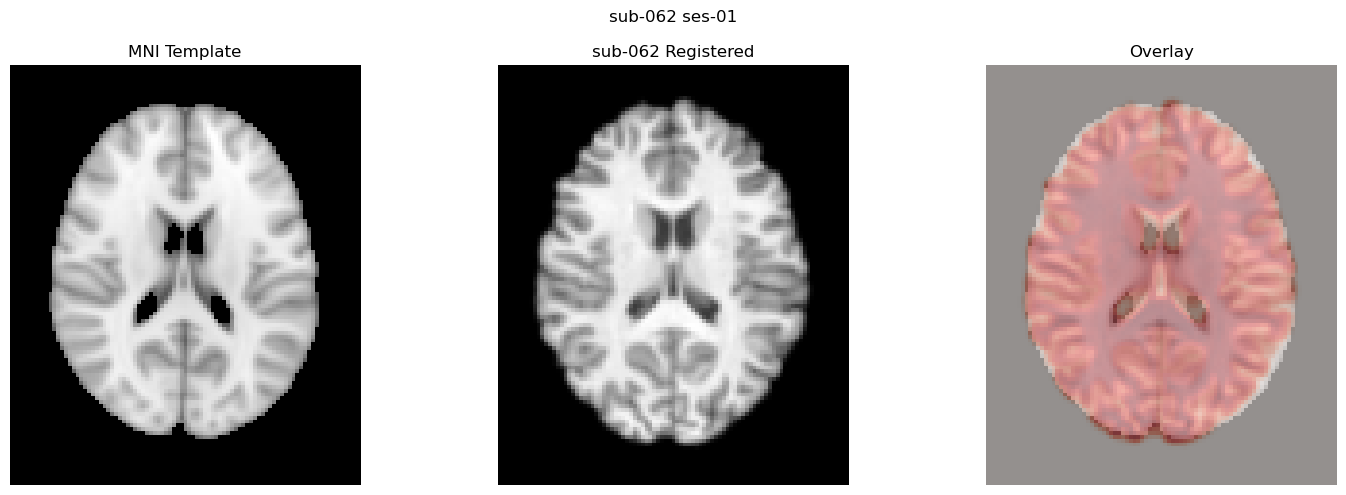


=== sub-062 ses-02 ===
✓ Registered shape: (91, 109, 91), MNI shape: (91, 109, 91)


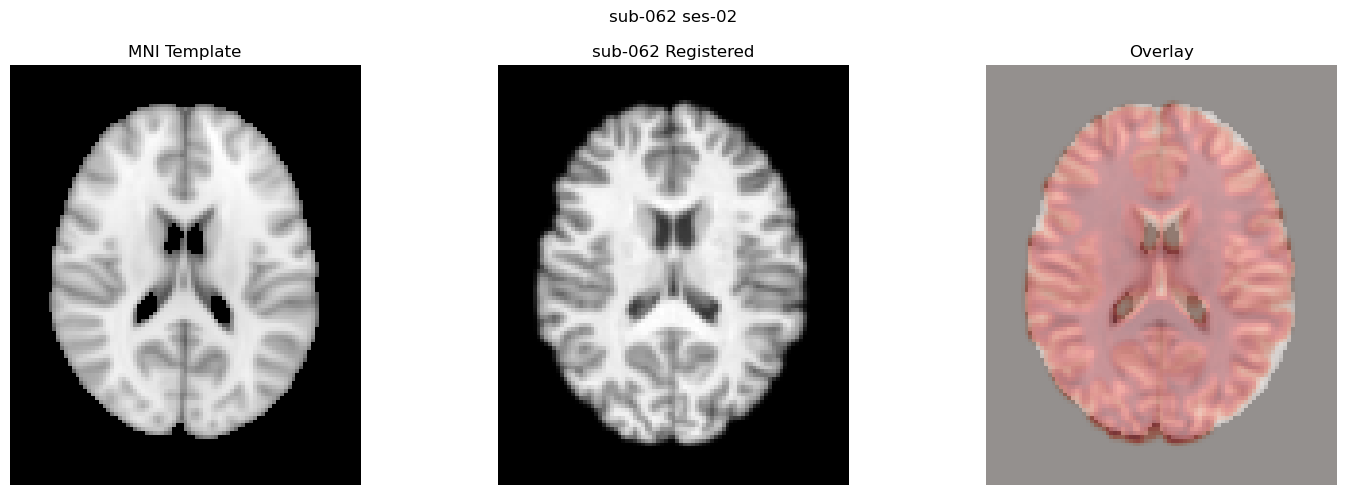


=== sub-064 ses-01 ===
✓ Registered shape: (91, 109, 91), MNI shape: (91, 109, 91)


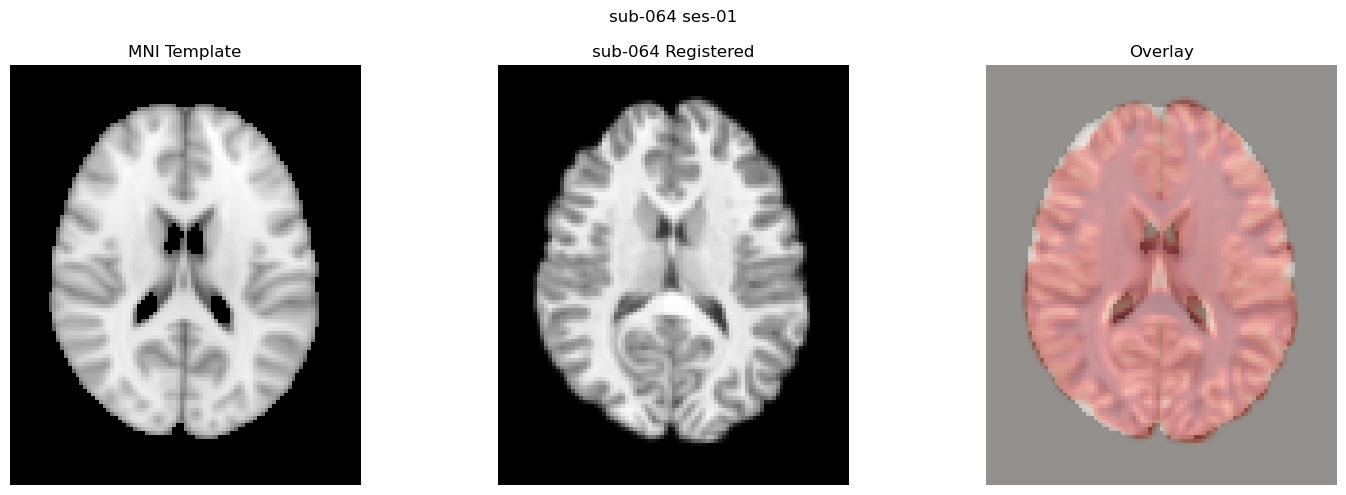


=== sub-064 ses-02 ===
✓ Registered shape: (91, 109, 91), MNI shape: (91, 109, 91)


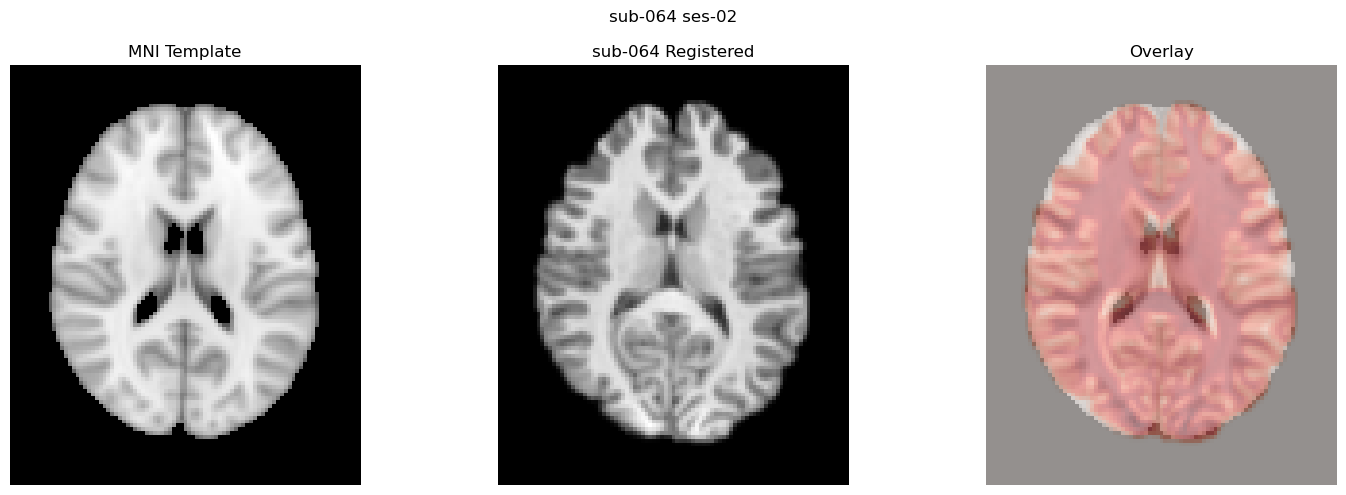


=== sub-068 ses-01 ===
✓ Registered shape: (91, 109, 91), MNI shape: (91, 109, 91)


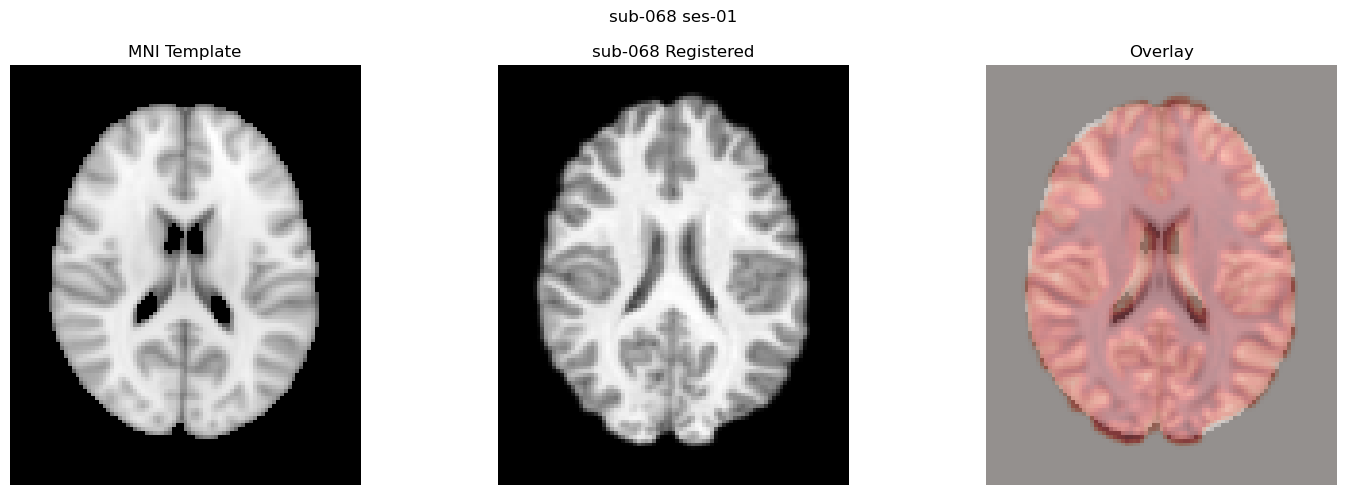


=== sub-068 ses-02 ===
✓ Registered shape: (91, 109, 91), MNI shape: (91, 109, 91)


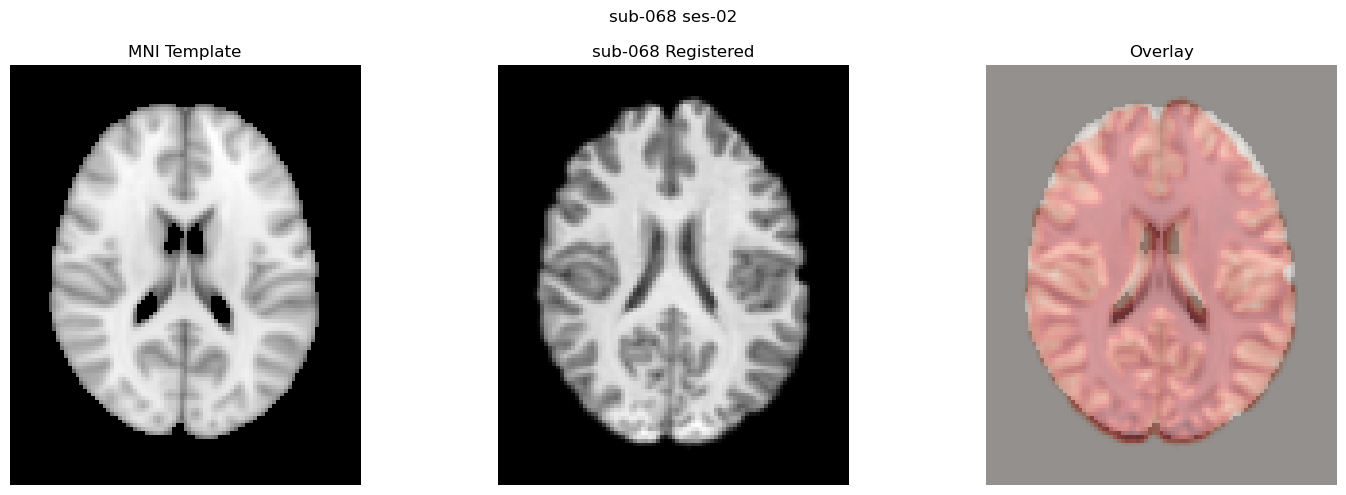

In [1]:
#!/usr/bin/env python3
"""
Check registration quality for all subjects
"""
import os
import pandas as pd
import nibabel as nib
import matplotlib.pyplot as plt

PROCESSED_DIR = '/user_data/csimmon2/long_pt'
CSV_FILE = '/user_data/csimmon2/git_repos/long_pt/long_pt_sub_info.csv'
MNI_BRAIN = '/opt/fsl/6.0.3/data/standard/MNI152_T1_2mm_brain.nii.gz'

SESSION_START = {'sub-010': 2, 'sub-018': 2}

def get_sessions_for_subject(row):
    """Count non-empty age columns"""
    age_cols = ['age_1', 'age_2', 'age_3', 'age_4', 'age_5']
    return sum(1 for col in age_cols if pd.notna(row[col]) and row[col] != '')

def check_registration(subject_id, session):
    """Check registration quality"""
    print(f"\n=== {subject_id} ses-{session:02d} ===")
    
    anat_dir = f'{PROCESSED_DIR}/{subject_id}/ses-{session:02d}/anat'
    registered = f'{anat_dir}/{subject_id}_ses-{session:02d}_T1w_brain_stand.nii.gz'
    
    if not os.path.exists(registered):
        print("❌ Registered brain not found")
        return False
    
    reg_img = nib.load(registered)
    mni_img = nib.load(MNI_BRAIN)
    reg_data = reg_img.get_fdata()
    mni_data = mni_img.get_fdata()
    
    print(f"✓ Registered shape: {reg_data.shape}, MNI shape: {mni_data.shape}")
    
    # Visualize
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    mid_slice = reg_data.shape[2] // 2
    
    axes[0].imshow(mni_data[:, :, mid_slice].T, cmap='gray', origin='lower')
    axes[0].set_title('MNI Template')
    axes[0].axis('off')
    
    axes[1].imshow(reg_data[:, :, mid_slice].T, cmap='gray', origin='lower')
    axes[1].set_title(f'{subject_id} Registered')
    axes[1].axis('off')
    
    axes[2].imshow(mni_data[:, :, mid_slice].T, cmap='gray', origin='lower', alpha=0.7)
    axes[2].imshow(reg_data[:, :, mid_slice].T, cmap='Reds', origin='lower', alpha=0.4)
    axes[2].set_title('Overlay')
    axes[2].axis('off')
    
    plt.suptitle(f'{subject_id} ses-{session:02d}')
    plt.tight_layout()
    plt.show()
    
    return True

# Main
df = pd.read_csv(CSV_FILE)

for _, row in df.iterrows():
    subject_id = row['sub']
    session_count = get_sessions_for_subject(row)
    start_ses = SESSION_START.get(subject_id, 1)
    
    for i in range(session_count):
        session = start_ses + i
        check_registration(subject_id, session)